# TRABAJO PRACTICO N° 1

#### Nota:

A lo largo de toda la notebook se definen funciones que son ejecutadas al final, por lo que en la última parte están todas ellas concatenadas entre sí, importando el dataset y devolviendo el dataset final.

In [1]:
#Importamos las librerias a utilizar en el TP1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
#Leemos el dataset
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 50
pd.options.display.float_format = "{:,.2f}".format
data = pd.read_csv('../TP1/properatti.csv')
raw_data = pd.read_csv('../TP1/properatti.csv')

import warnings
warnings.filterwarnings('ignore')

## 1- Análisis exploratorio del dataset

Realizamos un análisis exploratorio del dataset para tener una idea, lo mas completa posible, de cómo son nuestros datos. Para esto, es necesario organizarlos, entender su contenido, entender cuáles son las variables más relevantes y cómo se relacionan unas con otras, comenzar a ver algunos patrones, determinar qué hacer con los datos faltantes y con los datos atípicos, y finalmente extraer conclusiones acerca de todo este análisis.

Realizamos una visualización del dataset, como por ejemplo, cantidad de filas, de columnas, tipos de datos de esas columnas, cantidad de valores nulos. 


In [3]:
#Visualizacion del DataFrame usando las tres primeras filas, su tamaño y tipo de dato.

print("Cantidad de filas:", data.shape[0])
print("Cantidad de columnas:", data.shape[1])
print("Tipo de datos", type(data))
data.head(3)

Cantidad de filas: 121220
Cantidad de columnas: 26
Tipo de datos <class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"3,430,787.00","-34.6618237,-58.5088387",-34.66,-58.51,"62,000.00",USD,"1,093,959.00","62,000.00",55.00,40.00,"1,127.27","1,550.00",nan,nan,nan,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,"3,432,039.00","-34.9038831,-57.9643295",-34.90,-57.96,"150,000.00",USD,"2,646,675.00","150,000.00",nan,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"3,430,787.00","-34.6522615,-58.5229825",-34.65,-58.52,"72,000.00",USD,"1,270,404.00","72,000.00",55.00,55.00,"1,309.09","1,309.09",nan,nan,nan,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [4]:
#Analisis de las columnas del dataset de acuerdo al nombre y tipo de dato que contiene.
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [5]:
#Evaluación del porcentaje de datos faltante en cada columna.

(data.isnull().sum()/len(data)*100).round(2)

Unnamed: 0                    0.00
operation                     0.00
property_type                 0.00
place_name                    0.02
place_with_parent_names       0.00
country_name                  0.00
state_name                    0.00
geonames_id                  15.44
lat-lon                      42.53
lat                          42.53
lon                          42.53
price                        16.84
currency                     16.84
price_aprox_local_currency   16.84
price_aprox_usd              16.84
surface_total_in_m2          32.44
surface_covered_in_m2        16.42
price_usd_per_m2             43.39
price_per_m2                 27.69
floor                        93.48
rooms                        60.91
expenses                     88.23
properati_url                 0.00
description                   0.00
title                         0.00
image_thumbnail               2.57
dtype: float64

## 2- Evaluación de columnas de interes

Analizamos con mas detalle las columnas que creemos que son mas relevantes para conocer la ubicacion de la propiedad en venta: `operation`, `property_type`, `place_name`, `place_with_parent_names`, `state_name`, `price`, `surface_total_in_m2`, `surface_covered_in_m2`, `currency`, ###`lat-lon`.
Estas columnas nos sirven para hacer una estratificación por tipo de propiedad y lugar donde se encuentra, y calcular luego el precio por m².####La columna "lat-lon" nos puede servir para ver si la localidad/barrio ingresada coincide con la dirección.

Vemos que en el formulario de Properati, que se encuentra en su página de internet, estos datos son de campo libre, por lo que puede haber errores en el dataset. Solo el dato de `property_type` es un campo parametrizado por lo tanto no va a haber errores de carga de dato.


In [6]:
#Visualización de la cantidad de datos de cada columna seleccionada y la cantidad de valores nulos.
print(data["operation"].value_counts())
print("Cantidad de valores nulos: ",data["operation"].isnull().sum())

sell    121220
Name: operation, dtype: int64
Cantidad de valores nulos:  0


In [7]:
#Vemos los tipos de propiedadades del dataset y la cantidad de datos nulos.
print(data["property_type"].value_counts())
print("Cantidad de valores nulos: ",data['property_type'].isnull().sum())

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64
Cantidad de valores nulos:  0


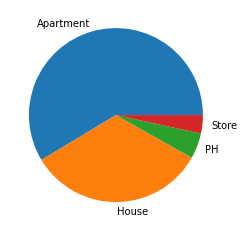

In [8]:
propiedades=['Apartment', 'House','PH','Store']
datos=[71065, 40268, 5751, 4136]
plt.pie(datos, labels=propiedades)
plt.show()

In [9]:
#Vemos los tipos a que localidades pertenecen las propiedades del dataset y la cantidad de datos nulos.
print(data["place_name"].value_counts())
print("Cantidad de valores nulos: ",data['place_name'].isnull().sum())

Córdoba                     9254
Rosario                     8504
Mar del Plata               6534
Tigre                       3324
Nordelta                    3315
                            ... 
La Colina Golf & Polo          1
Los Cipreses                   1
Playa Unión                    1
La Arboleda de Maschwitz       1
Las Chacras                    1
Name: place_name, Length: 1060, dtype: int64
Cantidad de valores nulos:  23


In [10]:
#Evaluamos la columna place with parent names. Consideramos que aporta información relevante con la que completar los datos
#faltantes de la columna place_name
print(data['place_with_parent_names'].value_counts())
print("Cantidad de valores nulos: ",data['place_with_parent_names'].isnull().sum())

|Argentina|Santa Fe|Rosario|                                                       8504
|Argentina|Córdoba|Córdoba|                                                        6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                             6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                                3315
|Argentina|Capital Federal|Belgrano|                                               2992
                                                                                   ... 
|Argentina|Córdoba|Villa Dolores|                                                     1
|Argentina|Buenos Aires Interior|Laprida|                                             1
|Argentina|Misiones|Azara|                                                            1
|Argentina|Buenos Aires Interior|Berisso|Los Talas|                                   1
|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|Barrio Cerrado "El Casco de Moreno"|       1
Name: place_with_parent_names, L

In [11]:
#Evaluamos la columna correspondiente al país. Son todas ventas de Argentina.
print(data['country_name'].value_counts())
print("Cantidad de valores nulos: ",data['country_name'].isnull().sum())

Argentina    121220
Name: country_name, dtype: int64
Cantidad de valores nulos:  0


In [12]:
#Evaluamos la columna place with parent names. Consideramos que aporta información relevante con la que completar los datos
#faltantes de la columna place_name
print(data['state_name'].value_counts())
print('Cantidad de valores nulos:',data['state_name'].isnull().sum())

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

Las columnas `operation` y `country_names` nos permitieron saber que todas las propiedades estan a la venta y son de Argentina. Asi que estas columnas no necesitan limpieza, pero tampoco aportan más datos. Por lo que no serán usadas en adelante.

Las columnas `property_type`, `place_name` y `place_with_parent_name` van a ser utilizadas para limpieza e imputación. Debido a que a `place_name` tiene campos nulos, serán completados a partir de la columna `place_with_parent_names`, tomando la tercera palabra despues del segundo pipe (|). 

---------------------------------------------------------------------------------------------------------------------------

Continuamos con el analisis en detalle las columnas relevantes para el análisis en cuanto a los precios de las propiedades en venta: `price`, `currency`, `price_aprox_local_currency`, `price_aprox_usd`. 
Teniendo el foco en encontrar el precio por metro cuadrado de cada propiedad también es importante analizar las columnas  `surface`, `surface_total_in_m2`, `surface_covered_in_m2`

In [13]:
def contar_transformar_columna_precio_m2(dataframe):
    '''Esta función contabiliza la cantidad de filas no nulas en la columna 'price_usd_per_m2' '''
    print1 = (dataframe['price_usd_per_m2'].notnull().sum() / dataframe.shape[0] *100).round(2)
    return print1

In [14]:
print(data['price_usd_per_m2'].value_counts())
print("Cantidad de valores nulos: ", data['price_usd_per_m2'].isnull().sum())
print1 = (data['price_usd_per_m2'].notnull().sum() / data.shape[0] *100).round(2)
print("Cant. de datos en 'price_usd_per_m2':   %", contar_transformar_columna_precio_m2(data))

2,000.00    574
2,500.00    447
1,000.00    397
1,500.00    391
1,666.67    373
           ... 
248.06        1
2,645.41      1
316.21        1
1,617.16      1
3,047.49      1
Name: price_usd_per_m2, Length: 25567, dtype: int64
Cantidad de valores nulos:  52603
Cant. de datos en 'price_usd_per_m2':   % 56.61


In [15]:
#Con esta función se intenta determinar en que rangos de valores se encuentran las propiedades en venta
def distribucion_precio(dataframe):
    sns.set(style="darkgrid")
    ax=sns.histplot(data=dataframe, x="price_usd_per_m2", stat="count")
    ax.set_xlim(-1000,25000)
    ax.set_ylim(-100,2100)
    plt.show()

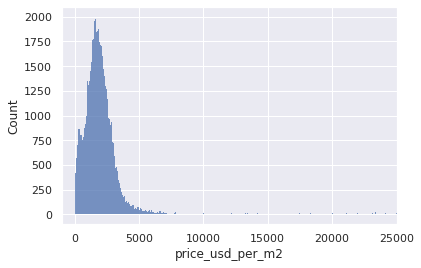

In [16]:
distribucion_precio(data)

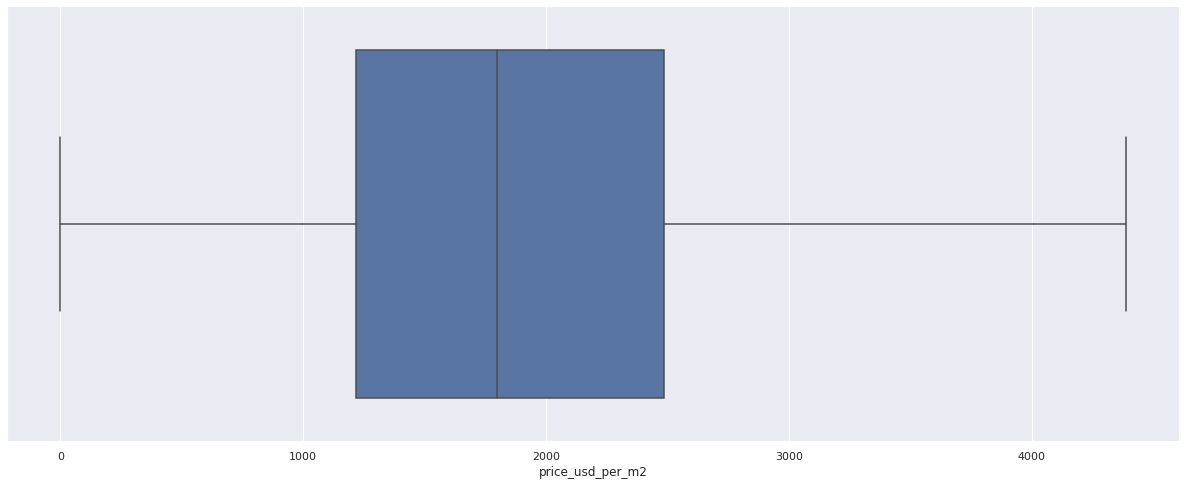

In [17]:
#Con esta función se intenta determinar en que rangos de valores se encuentran las propiedades en ventax="price_usd_per_m2"
fig, axs = plt.subplots(ncols=1, figsize=(21,8))
sns.set(style="darkgrid")
ax = sns.boxplot(x=data.price_usd_per_m2, data=data, showfliers=False)
plt.show()

### (b) Tomar precio de /m2 en pesos

Analizamos completar la columna `price_usd_per_m2` conviertiendo en dolares la columna `price_per_m2`. 
Es necesario saber la conversión del tipo de cambio de dólar respecto al peso. Para esto mismo, se calculará el promedio del precio en USD y del precio en $ de todas las filas no nulas que contengan ambos valores.

En esta primera función, se estima la media del tipo de cambio entre el precio en pesos y el precio en dólares, las columnas `price_aprox_local_currency` / `price_aprox_usd`

In [18]:
def estimar_tipo_de_cambio(dataframe):
    '''Esta función estima el tipo de cambio promedio entre 'price_aprox_local_currency' y 'price_aprox_usd'  '''
    mask_tipo_de_cambio = (data['price_aprox_local_currency'].notnull() & data['price_aprox_usd'].notnull())
    calculo_tipo_de_cambio = data.loc[mask_tipo_de_cambio, 'price_aprox_local_currency'] / data.loc[mask_tipo_de_cambio, 'price_aprox_usd']
    tipo_de_cambio = calculo_tipo_de_cambio.mean()
    valor = (tipo_de_cambio).round(2)
    return valor

In [19]:
print("Tipo de cambio promedio entre entre 'price_aprox_local_currency' y 'price_aprox_usd': ", estimar_tipo_de_cambio(data), "$/USD ")

Tipo de cambio promedio entre entre 'price_aprox_local_currency' y 'price_aprox_usd':  17.64 $/USD 


Para comparar este dato, se toma el valor del dólar de ese entonces, primer semestre de 2017.  Por esto mismo, para hacer la conversión del tipo de cambio dólar / peso se hace un promedio entre la primera cotización del semestre y la última, a saber:

02-01-2017: 16.3 $ / USD 

30-06-2017: 16.87 $ / USD

Tomando el promedio de 16.59 $ / USD, está cercano al valor de  17.64 obtenido antes, por lo tanto es un dato aceptable

Por lo tanto, podría hacer esta misma comprobación con las columnas que miden el precio por metro cuadrado para ver si la columna `price_per_m2` que está medida en pesos es confiable. De la misma manera que antes se calcula:

In [20]:
def estimar_tipo_de_cambio_segun_m2(dataframe):
    '''Esta función estima el tipo de cambio promedio entre 'price_per_m2' y 'price_usd_per_m2' '''
    mask_cambio = (dataframe['price_per_m2'].notnull() & dataframe['price_usd_per_m2'].notnull())
    prueba = dataframe.loc[mask_cambio, 'price_per_m2'] / dataframe.loc[mask_cambio, 'price_usd_per_m2']
    print1 = (prueba.mean()).round(2)
    return print1

In [21]:
print("Tipo de cambio promedio entre entre 'price_per_m2' y 'price_usd_per_m2': ", estimar_tipo_de_cambio_segun_m2(data), "$/USD")

Tipo de cambio promedio entre entre 'price_per_m2' y 'price_usd_per_m2':  5.87 $/USD


Como se puede ver, este valor está muy lejano al tipo de cambio real, por lo que no pueden tomarse los datos de la columna price_per_m2 como ciertos. Se descarta usar esta fuente de datos.

## 3- Limpieza 

### 3.1 - Limpieza gruesa

#### Para quedarnos solo con las columnas importantes

Nos quedamos solo con las columnas que aportan valor para estimar el precio del metro cuadrado

In [22]:
def eliminar_columnas(dataframe):
    dataframe = dataframe.drop(columns=['Unnamed: 0','operation','country_name','geonames_id','lat','lon','floor','expenses','properati_url','image_thumbnail'])
    return dataframe

In [23]:
data = eliminar_columnas(data)
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat-lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'rooms', 'description', 'title'],
      dtype='object')

#### Para quedarnos sólo con ARS y USD, eliminando los otros

Eliminamos las filas que tengan precios publicados en monedas que no sean pesos ni dolares

In [24]:
def eliminar_otras_currency(dataframe):
    mask_uyu = dataframe.currency == "UYU"
    mask_pen = dataframe.currency == "PEN"
    dataframe = dataframe.drop(data.currency[mask_uyu].index)
    dataframe = dataframe.drop(data.currency[mask_pen].index)
    return dataframe

In [25]:
data = eliminar_otras_currency(data)
data.currency.value_counts()

USD    87587
ARS    13219
Name: currency, dtype: int64

In [26]:
data.property_type.value_counts()

apartment    71063
house        40267
PH            5751
store         4136
Name: property_type, dtype: int64

#### Para quedarnos solo apartment y house

Eliminamos las filas que no contengan apartment y house, debido a que los demás hay pocos registros en proporcion a los que hay en apartment y house

In [27]:
def eliminar_ph_y_store(dataframe):
    dataframe = dataframe.drop(dataframe.loc[dataframe.property_type == 'PH'].index)
    dataframe = dataframe.drop(dataframe.loc[dataframe.property_type == 'store'].index)
    return dataframe

In [28]:
data = eliminar_ph_y_store(data)
data.property_type.value_counts()

apartment    71063
house        40267
Name: property_type, dtype: int64

#### Para quedarnos solo con >1000 publicaciones por ciudad

Nos quedamos con los registros que pertenezcan a ciudades donde haya al menos mas de 1000 publicaciones ya que el resto no es un numero que estimamos suficiente para realizar una estimación adecuada

In [29]:
data.state_name.value_counts()

Capital Federal                 29122
Bs.As. G.B.A. Zona Norte        23986
Bs.As. G.B.A. Zona Sur          12492
Córdoba                         11202
Santa Fe                         9893
Buenos Aires Costa Atlántica     9146
Bs.As. G.B.A. Zona Oeste         8281
Buenos Aires Interior            2170
Río Negro                         699
Mendoza                           649
Tucumán                           639
Neuquén                           613
Corrientes                        505
Misiones                          449
Entre Ríos                        354
Salta                             271
San Luis                          235
Chubut                            212
La Pampa                          147
Formosa                            65
Chaco                              54
San Juan                           39
Tierra Del Fuego                   28
Catamarca                          27
Jujuy                              25
Santa Cruz                         19
La Rioja    

In [30]:
def solo_mayores_a_mil(dataframe):
    cantidad_de_publicaciones = 1000
    lista = list((dataframe['state_name'].value_counts()>1000)[dataframe['state_name'].value_counts()>cantidad_de_publicaciones].index)
    dataframe = dataframe[dataframe['state_name'].isin(lista)]
    return dataframe

In [31]:
data = solo_mayores_a_mil(data)
data.state_name.value_counts()

Capital Federal                 29122
Bs.As. G.B.A. Zona Norte        23986
Bs.As. G.B.A. Zona Sur          12492
Córdoba                         11202
Santa Fe                         9893
Buenos Aires Costa Atlántica     9146
Bs.As. G.B.A. Zona Oeste         8281
Buenos Aires Interior            2170
Name: state_name, dtype: int64

### 3.2- Extracción de datos sobre las variables descriptivas de texto

Vamos a extraer datos que son relevantes de las columnas "title" y "description". Consideramos que estas columnas aportan datos fundamentales en cuanto a las dimensiones ocupadas por cada propiedad.

In [32]:
#Convertimos los nombres de los numeros en español a entero (desde el 1 al 1500)

def digit_str_to_int(digit_as_str):
    switcher = {
        "uno":1,
"dos":2,
"tres":3,
"cuatro":4,
"cinco":5,
"seis":6,
"siete":7,
"ocho":8,
"nueve":9,
"diez":10,
"once":11,
"doce":12,
"trece":13,
"catorce":14,
"quince":15,
"dieciseis":16,
"de diecisiete":17,
"dieciocho":18,
"diecinueve":19,
"veinte":20,
"veintiun":21,
"veintidos":22,
"veintitres":23,
"veinticuatro":24,
"veinticinco":25,
"veintiseis":26,
"veintisiete":27,
"veintiocho":28,
"veintinueve":29,
"treinta":30,
"treinta y uno":31,
"treinta y dos":32,
"treinta y tres":33,
"treinta y cuatro":34,
"treinta y cinco":35,
"treinta y seis":36,
"treinta y siete":37,
"treinta y ocho":38,
"treinta y nueve":39,
"cuarenta":40,
"cuarenta y uno":41,
"cuarenta y dos":42,
"cuarenta y tres":43,
"cuarenta y cuatro":44,
"cuarenta y cinco":45,
"cuarenta y seis":46,
"cuarenta y siete":47,
"cuarenta y ocho":48,
"cuarenta y nueve":49,
"cincuenta":50,
"cincuenta y uno":51,
"cincuenta y dos":52,
"cincuenta y tres":53,
"cincuenta y cuatro":54,
"cincuenta y cinco":55,
"cincuenta y seis":56,
"cincuenta y siete":57,
"cincuenta y ocho":58,
"cincuenta y nueve":59,
"sesenta":60,
"sesenta y uno":61,
"sesenta y dos":62,
"sesenta y tres":63,
"sesenta y cuatro":64,
"sesenta y cinco":65,
"sesenta y seis":66,
"sesenta y siete":67,
"sesenta y ocho":68,
"sesenta y nueve":69,
"setenta":70,
"setenta y uno":71,
"setenta y dos":72,
"setenta y tres":73,
"setenta y cuatro":74,
"setenta y cinco":75,
"setenta y seis":76,
"setenta y siete":77,
"setenta y ocho":78,
"setenta y nueve":79,
"ochenta":80,
"ochenta y uno":81,
"ochenta y dos":82,
"ochenta y tres":83,
"ochenta y cuatro":84,
"ochenta y cinco":85,
"ochenta y seis":86,
"ochenta y siete":87,
"ochenta y ocho":88,
"ochenta y nueve":89,
"noventa":90,
"noventa y uno":91,
"noventa y dos":92,
"noventa y tres":93,
"noventa y cuatro":94,
"noventa y cinco":95,
"noventa y seis":96,
"noventa y siete":97,
"noventa y ocho":98,
"noventa y nueve":99,
"cien":100,
"ciento uno":101,
"ciento dos":102,
"ciento tres":103,
"ciento cuatro":104,
"ciento cinco":105,
"ciento seis":106,
"ciento siete":107,
"ciento ocho":108,
"ciento nueve":109,
"ciento diez":110,
"ciento once":111,
"ciento doce":112,
"ciento trece":113,
"ciento catorce":114,
"ciento quince":115,
"ciento dieciseis":116,
"cientodiecisiete":117,
"ciento dieciocho":118,
"ciento diecinueve":119,
"ciento veinte":120,
"ciento veintiuno":121,
"ciento veintidos":122,
"ciento veintitres":123,
"ciento veinticuatro":124,
"ciento veinticinco":125,
"ciento veintiseis":126,
"cientoveintisiete":127,
"ciento veintiocho":128,
"ciento veintinueve":129,
"ciento treinta":130,
"ciento treinta y uno":131,
"ciento treinta y dos":132,
"ciento treinta y tres":133,
"ciento treinta y cuatro":134,
"ciento treinta y cinco":135,
"ciento treinta y seis":136,
"ciento treinta y siete":137,
"ciento treinta y ocho":138,
"ciento treinta y nueve":139,
"ciento cuarenta":140,
"ciento cuarenta y uno":141,
"ciento cuarenta y dos":142,
"ciento cuarenta y tres":143,
"ciento cuarenta y cuatro":144,
"ciento cuarenta y cinco":145,
"ciento cuarenta y seis":146,
"ciento cuarenta y siete":147,
"ciento cuarenta y ocho":148,
"ciento cuarenta y nueve":149,
"ciento cincuenta":150,
"ciento cincuenta y uno":151,
"ciento cincuenta y dos":152,
"ciento cincuenta y tres":153,
"ciento cincuenta y cuatro":154,
"ciento cincuenta y cinco":155,
"ciento cincuenta y seis":156,
"ciento cincuenta y siete":157,
"ciento cincuenta y ocho":158,
"ciento cincuenta y nueve":159,
"ciento sesenta":160,
"ciento sesenta y uno":161,
"ciento sesenta y dos":162,
"ciento sesenta y tres":163,
"ciento sesenta y cuatro":164,
"ciento sesenta y cinco":165,
"ciento sesenta y seis":166,
"ciento sesenta y siete":167,
"ciento sesenta y ocho":168,
"ciento sesenta y nueve":169,
"ciento setenta":170,
"ciento setenta y uno":171,
"ciento setenta y dos":172,
"ciento setenta y tres":173,
"ciento setenta y cuatro":174,
"ciento setenta y cinco":175,
"ciento setenta y seis":176,
"ciento setenta y siete":177,
"ciento setenta y ocho":178,
"ciento setenta y nueve":179,
"ciento ochenta":180,
"ciento ochenta y uno":181,
"ciento ochenta y dos":182,
"ciento ochenta y tres":183,
"ciento ochenta y cuatro":184,
"ciento ochenta y cinco":185,
"ciento ochenta y seis":186,
"ciento ochenta y siete":187,
"ciento ochenta y ocho":188,
"ciento ochenta y nueve":189,
"ciento noventa":190,
"ciento noventa y uno":191,
"ciento noventa y dos":192,
"ciento noventa y tres":193,
"ciento noventa y cuatro":194,
"ciento noventa y cinco":195,
"ciento noventa y seis":196,
"ciento noventa y siete":197,
"ciento noventa y ocho":198,
"ciento noventa y nueve":199,
"doscientos":200,
"doscientos uno":201,
"doscientos dos":202,
"doscientos tres":203,
"doscientos cuatro":204,
"doscientos cinco":205,
"doscientos seis":206,
"doscientos siete":207,
"doscientos ocho":208,
"doscientos nueve":209,
"doscientos diez":210,
"doscientos once":211,
"doscientos doce":212,
"doscientos trece":213,
"doscientos catorce":214,
"doscientos quince":215,
"doscientos dieciseis":216,
"doscientos diecisiete":217,
"doscientos dieciocho":218,
"doscientos diecinueve":219,
"doscientos veinte":220,
"doscientos veintiuno":221,
"doscientos veintidos":222,
"doscientos veintitres":223,
"doscientos veinticuatro":224,
"doscientos veinticinco":225,
"doscientos veintiseis":226,
"doscientos veintisiete":227,
"doscientos veintiocho":228,
"doscientos veintinueve":229,
"doscientos treinta":230,
"doscientos treinta y uno":231,
"doscientos treinta y dos":232,
"doscientos treinta y tres":233,
"doscientos treinta y cuatro":234,
"doscientos treinta y cinco":235,
"doscientos treinta y seis":236,
"doscientos treinta y siete":237,
"doscientos treinta y ocho":238,
"doscientos treinta y nueve":239,
"doscientos cuarenta":240,
"doscientos cuarenta y uno":241,
"doscientos cuarenta y dos":242,
"doscientos cuarenta y tres":243,
"doscientos cuarenta y cuatro":244,
"doscientos cuarenta y cinco":245,
"doscientos cuarenta y seis":246,
"doscientos cuarenta y siete":247,
"doscientos cuarenta y ocho":248,
"doscientos cuarenta y nueve":249,
"doscientos cincuenta":250,
"doscientos cincuenta y uno":251,
"doscientos cincuenta y dos":252,
"doscientos cincuenta y tres":253,
"doscientos cincuenta y cuatro":254,
"doscientos cincuenta y cinco":255,
"doscientos cincuenta y seis":256,
"doscientos cincuenta y siete":257,
"doscientos cincuenta y ocho":258,
"doscientos cincuenta y nueve":259,
"doscientos sesenta":260,
"doscientos sesenta y uno":261,
"doscientos sesenta y dos":262,
"doscientos sesenta y tres":263,
"doscientos sesenta y cuatro":264,
"doscientos sesenta y cinco":265,
"doscientos sesenta y seis":266,
"doscientos sesenta y siete":267,
"doscientos sesenta y ocho":268,
"doscientos sesenta y nueve":269,
"doscientos setenta":270,
"doscientos setenta y uno":271,
"doscientos setenta y dos":272,
"doscientos setenta y tres":273,
"doscientos setenta y cuatro":274,
"doscientos setenta y cinco":275,
"doscientos setenta y seis":276,
"doscientos setenta y siete":277,
"doscientos setenta y ocho":278,
"doscientos setenta y nueve":279,
"doscientos ochenta":280,
"doscientos ochenta y uno":281,
"doscientos ochenta y dos":282,
"doscientos ochenta y tres":283,
"doscientos ochenta y cuatro":284,
"doscientos ochenta y cinco":285,
"doscientos ochenta y seis":286,
"doscientos ochenta y siete":287,
"doscientos ochenta y ocho":288,
"doscientos ochenta y nueve":289,
"doscientos noventa":290,
"doscientos noventa y uno":291,
"doscientos noventa y dos":292,
"doscientos noventa y tres":293,
"doscientos noventa y cuatro":294,
"doscientos noventa y cinco":295,
"doscientos noventa y seis":296,
"doscientos noventa y siete":297,
"doscientos noventa y ocho":298,
"doscientos noventa y nueve":299,
"trescientos":300,
"trescientos uno":301,
"trescientos dos":302,
"trescientos tres":303,
"trescientos cuatro":304,
"trescientos cinco":305,
"trescientos seis":306,
"trescientos siete":307,
"trescientos ocho":308,
"trescientos nueve":309,
"trescientos diez":310,
"trescientos once":311,
"trescientos doce":312,
"trescientos trece":313,
"trescientos catorce":314,
"trescientos quince":315,
"trescientos dieciseis":316,
"trescientos diecisiete":317,
"trescientos dieciocho":318,
"trescientos diecinueve":319,
"trescientos veinte":320,
"trescientos veintiuno":321,
"trescientos veintidos":322,
"trescientos veintitres":323,
"trescientos veinticuatro":324,
"trescientos veinticinco":325,
"trescientos veintiseis":326,
"trescientos veintisiete":327,
"trescientos veintiocho":328,
"trescientos veintinueve":329,
"trescientos treinta":330,
"trescientos treinta y uno":331,
"trescientos treinta y dos":332,
"trescientos treinta y tres":333,
"trescientos treinta y cuatro":334,
"trescientos treinta y cinco":335,
"trescientos treinta y seis":336,
"trescientos treinta y siete":337,
"trescientos treinta y ocho":338,
"trescientos treinta y nueve":339,
"trescientos cuarenta":340,
"trescientos cuarenta y uno":341,
"trescientos cuarenta y dos":342,
"trescientos cuarenta y tres":343,
"trescientos cuarenta y cuatro":344,
"trescientos cuarenta y cinco":345,
"trescientos cuarenta y seis":346,
"trescientos cuarenta y siete":347,
"trescientos cuarenta y ocho":348,
"trescientos cuarenta y nueve":349,
"trescientos cincuenta":350,
"trescientos cincuenta y uno":351,
"trescientos cincuenta y dos":352,
"trescientos cincuenta y tres":353,
"trescientos cincuenta y cuatro":354,
"trescientos cincuenta y cinco":355,
"trescientos cincuenta y seis":356,
"trescientos cincuenta y siete":357,
"trescientos cincuenta y ocho":358,
"trescientos cincuenta y nueve":359,
"trescientos sesenta":360,
"trescientos sesenta y uno":361,
"trescientos sesenta y dos":362,
"trescientos sesenta y tres":363,
"trescientos sesenta y cuatro":364,
"trescientos sesenta y cinco":365,
"trescientos sesenta y seis":366,
"trescientos sesenta y siete":367,
"trescientos sesenta y ocho":368,
"trescientos sesenta y nueve":369,
"trescientos setenta":370,
"trescientos setenta y uno":371,
"trescientos setenta y dos":372,
"trescientos setenta y tres":373,
"trescientos setenta y cuatro":374,
"trescientos setenta y cinco":375,
"trescientos setenta y seis":376,
"trescientos setenta y siete":377,
"trescientos setenta y ocho":378,
"trescientos setenta y nueve":379,
"trescientos ochenta":380,
"trescientos ochenta y uno":381,
"trescientos ochenta y dos":382,
"trescientos ochenta y tres":383,
"trescientos ochenta y cuatro":384,
"trescientos ochenta y cinco":385,
"trescientos ochenta y seis":386,
"trescientos ochenta y siete":387,
"trescientos ochenta y ocho":388,
"trescientos ochenta y nueve":389,
"trescientos noventa":390,
"trescientos noventa y uno":391,
"trescientos noventa y dos":392,
"trescientos noventa y tres":393,
"trescientos noventa y cuatro":394,
"trescientos noventa y cinco":395,
"trescientos noventa y seis":396,
"trescientos noventa y siete":397,
"trescientos noventa y ocho":398,
"trescientos noventa y nueve":399,
"cuatrocientos":400,
"cuatrocientos uno":401,
"cuatrocientos dos":402,
"cuatrocientos tres":403,
"cuatrocientos cuatro":404,
"cuatrocientos cinco":405,
"cuatrocientos seis":406,
"cuatrocientos siete":407,
"cuatrocientos ocho":408,
"cuatrocientos nueve":409,
"cuatrocientos diez":410,
"cuatrocientos once":411,
"cuatrocientos doce":412,
"cuatrocientos trece":413,
"cuatrocientos catorce":414,
"cuatrocientos quince":415,
"cuatrocientos dieciseis":416,
"cuatrocientos diecisiete":417,
"cuatrocientos dieciocho":418,
"cuatrocientos diecinueve":419,
"cuatrocientos veinte":420,
"cuatrocientos veintiuno":421,
"cuatrocientos veintidos":422,
"cuatrocientos veintitres":423,
"cuatrocientos veinticuatro":424,
"cuatrocientos veinticinco":425,
"cuatrocientos veintiseis":426,
"cuatrocientos veintisiete":427,
"cuatrocientos veintiocho":428,
"cuatrocientos veintinueve":429,
"cuatrocientos treinta":430,
"cuatrocientos treinta y uno":431,
"cuatrocientos treinta y dos":432,
"cuatrocientos treinta y tres":433,
"cuatrocientos treinta y cuatro":434,
"cuatrocientos treinta y cinco":435,
"cuatrocientos treinta y seis":436,
"cuatrocientos treinta y siete":437,
"cuatrocientos treinta y ocho":438,
"cuatrocientos treinta y nueve":439,
"cuatrocientos cuarenta":440,
"cuatrocientos cuarenta y uno":441,
"cuatrocientos cuarenta y dos":442,
"cuatrocientos cuarenta y tres":443,
"cuatrocientos cuarenta y cuatro":444,
"cuatrocientos cuarenta y cinco":445,
"cuatrocientos cuarenta y seis":446,
"cuatrocientos cuarenta y siete":447,
"cuatrocientos cuarenta y ocho":448,
"cuatrocientos cuarenta y nueve":449,
"cuatrocientos cincuenta":450,
"cuatrocientos cincuenta y uno":451,
"cuatrocientos cincuenta y dos":452,
"cuatrocientos cincuenta y tres":453,
"cuatrocientos cincuenta y cuatro":454,
"cuatrocientos cincuenta y cinco":455,
"cuatrocientos cincuenta y seis":456,
"cuatrocientos cincuenta y siete":457,
"cuatrocientos cincuenta y ocho":458,
"cuatrocientos cincuenta y nueve":459,
"cuatrocientos sesenta":460,
"cuatrocientos sesenta y uno":461,
"cuatrocientos sesenta y dos":462,
"cuatrocientos sesenta y tres":463,
"cuatrocientos sesenta y cuatro":464,
"cuatrocientos sesenta y cinco":465,
"cuatrocientos sesenta y seis":466,
"cuatrocientossesentaysiete":467,
"cuatrocientos sesenta y ocho":468,
"cuatrocientos sesenta y nueve":469,
"cuatrocientos setenta":470,
"cuatrocientos setenta y uno":471,
"cuatrocientos setenta y dos":472,
"cuatrocientos setenta y tres":473,
"cuatrocientos setenta y cuatro":474,
"cuatrocientos setenta y cinco":475,
"cuatrocientos setenta y seis":476,
"cuatrocientos setenta y siete":477,
"cuatrocientos setenta y ocho":478,
"cuatrocientos setenta y nueve":479,
"cuatrocientos ochenta":480,
"cuatrocientos ochenta y uno":481,
"cuatrocientos ochenta y dos":482,
"cuatrocientos ochenta y tres":483,
"cuatrocientos ochenta y cuatro":484,
"cuatrocientos ochenta y cinco":485,
"cuatrocientos ochenta y seis":486,
"cuatrocientos ochenta y siete":487,
"cuatrocientos ochenta y ocho":488,
"cuatrocientos ochenta y nueve":489,
"cuatrocientos noventa":490,
"cuatrocientos noventa y uno":491,
"cuatrocientos noventa y dos":492,
"cuatrocientos noventa y tres":493,
"cuatrocientos noventa y cuatro":494,
"cuatrocientos noventa y cinco":495,
"cuatrocientos noventa y seis":496,
"cuatrocientos noventa y siete":497,
"cuatrocientos noventa y ocho":498,
"cuatrocientos noventa y nueve":499,
"quinientos":500,
"quinientos uno":501,
"quinientos dos":502,
"quinientos tres":503,
"quinientos cuatro":504,
"quinientos cinco":505,
"quinientos seis":506,
"quinientos siete":507,
"quinientos ocho":508,
"quinientos nueve":509,
"quinientos diez":510,
"quinientos once":511,
"quinientos doce":512,
"quinientos trece":513,
"quinientos catorce":514,
"quinientos quince":515,
"quinientos dieciseis":516,
"quinientos diecisiete":517,
"quinientos dieciocho":518,
"quinientos diecinueve":519,
"quinientos veinte":520,
"quinientos veintiuno":521,
"quinientos veintidos":522,
"quinientos veintitres":523,
"quinientos veinticuatro":524,
"quinientos veinticinco":525,
"quinientos veintiseis":526,
"quinientos veintisiete":527,
"quinientos veintiocho":528,
"quinientos veintinueve":529,
"quinientos treinta":530,
"quinientos treinta y uno":531,
"quinientos treinta y dos":532,
"quinientos treinta y tres":533,
"quinientos treinta y cuatro":534,
"quinientos treinta y cinco":535,
"quinientos treinta y seis":536,
"quinientos treinta y siete":537,
"quinientos treinta y ocho":538,
"quinientos treinta y nueve":539,
"quinientos cuarenta":540,
"quinientos cuarenta y uno":541,
"quinientos cuarenta y dos":542,
"quinientos cuarenta y tres":543,
"quinientos cuarenta y cuatro":544,
"quinientos cuarenta y cinco":545,
"quinientos cuarenta y seis":546,
"quinientos cuarenta y siete":547,
"quinientos cuarenta y ocho":548,
"quinientos cuarenta y nueve":549,
"quinientos cincuenta":550,
"quinientos cincuenta y uno":551,
"quinientos cincuenta y dos":552,
"quinientos cincuenta y tres":553,
"quinientos cincuenta y cuatro":554,
"quinientos cincuenta y cinco":555,
"quinientos cincuenta y seis":556,
"quinientos cincuenta y siete":557,
"quinientos cincuenta y ocho":558,
"quinientos cincuenta y nueve":559,
"quinientos sesenta":560,
"quinientos sesenta y uno":561,
"quinientos sesenta y dos":562,
"quinientos sesenta y tres":563,
"quinientos sesenta y cuatro":564,
"quinientos sesenta y cinco":565,
"quinientos sesenta y seis":566,
"quinientos sesenta y siete":567,
"quinientos sesenta y ocho":568,
"quinientos sesenta y nueve":569,
"quinientos setenta":570,
"quinientos setenta y uno":571,
"quinientos setenta y dos":572,
"quinientos setenta y tres":573,
"quinientos setenta y cuatro":574,
"quinientos setenta y cinco":575,
"quinientos setenta y seis":576,
"quinientos setenta y siete":577,
"quinientos setenta y ocho":578,
"quinientos setenta y nueve":579,
"quinientos ochenta":580,
"quinientos ochenta y uno":581,
"quinientos ochenta y dos":582,
"quinientos ochenta y tres":583,
"quinientos ochenta y cuatro":584,
"quinientos ochenta y cinco":585,
"quinientos ochenta y seis":586,
"quinientos ochenta y siete":587,
"quinientos ochenta y ocho":588,
"quinientos ochenta y nueve":589,
"quinientos noventa":590,
"quinientos noventa y uno":591,
"quinientos noventa y dos":592,
"quinientos noventa y tres":593,
"quinientos noventa y cuatro":594,
"quinientos noventa y cinco":595,
"quinientos noventa y seis":596,
"quinientos noventa y siete":597,
"quinientos noventa y ocho":598,
"quinientos noventa y nueve":599,
"seiscientos":600,
"seiscientos uno":601,
"seiscientos dos":602,
"seiscientos tres":603,
"seiscientos cuatro":604,
"seiscientos cinco":605,
"seiscientos seis":606,
"seiscientos siete":607,
"seiscientos ocho":608,
"seiscientos nueve":609,
"seiscientos diez":610,
"seiscientos once":611,
"seiscientos doce":612,
"seiscientos trece":613,
"seiscientos catorce":614,
"seiscientos quince":615,
"seiscientos dieciseis":616,
"seiscientos diecisiete":617,
"seiscientos dieciocho":618,
"seiscientos diecinueve":619,
"seiscientos veinte":620,
"seiscientos veintiuno":621,
"seiscientos veintidos":622,
"seiscientos veintitres":623,
"seiscientos veinticuatro":624,
"seiscientos veinticinco":625,
"seiscientos veintiseis":626,
"seiscientos veintisiete":627,
"seiscientos veintiocho":628,
"seiscientos veintinueve":629,
"seiscientos treinta":630,
"seiscientos treinta y uno":631,
"seiscientos treinta y dos":632,
"seiscientos treinta y tres":633,
"seiscientos treinta y cuatro":634,
"seiscientos treinta y cinco":635,
"seiscientos treinta y seis":636,
"seiscientos treinta y siete":637,
"seiscientos treinta y ocho":638,
"seiscientos treinta y nueve":639,
"seiscientos cuarenta":640,
"seiscientos cuarenta y uno":641,
"seiscientos cuarenta y dos":642,
"seiscientos cuarenta y tres":643,
"seiscientos cuarenta y cuatro":644,
"seiscientos cuarenta y cinco":645,
"seiscientos cuarenta y seis":646,
"seiscientos cuarenta y siete":647,
"seiscientos cuarenta y ocho":648,
"seiscientos cuarenta y nueve":649,
"seiscientos cincuenta":650,
"seisciento cincuenta y uno":651,
"seiscientos cincuenta y dos":652,
"seiscientos cincuenta y tres":653,
"seiscientos cincuenta y cuatro":654,
"seiscientos cincuenta y cinco":655,
"seiscientos cincuenta y seis":656,
"seiscientos cincuenta y siete":657,
"seiscientos cincuenta y ocho":658,
"seiscientos cincuenta y nueve":659,
"seiscientos sesenta":660,
"seiscientos sesenta y uno":661,
"seiscientos sesenta y dos":662,
"seiscientos sesenta y tres":663,
"seiscientos sesenta y cuatro":664,
"seiscientos sesenta y cinco":665,
"seiscientos sesenta y seis":666,
"seiscientos sesenta y siete":667,
"seiscientos sesenta y ocho":668,
"seiscientos sesenta y nueve":669,
"seiscientos setenta":670,
"seiscientos setenta y uno":671,
"seiscientos setenta y dos":672,
"seiscientos setenta y tres":673,
"seiscientos setenta y cuatro":674,
"seiscientos setenta y cinco":675,
"seiscientos setenta y seis":676,
"seiscientos setenta y siete":677,
"seiscientos setenta y ocho":678,
"seiscientos setenta y nueve":679,
"seiscientos ochenta":680,
"seiscientos ochenta y uno":681,
"seiscientos ochenta y dos":682,
"seiscientos ochenta y tres":683,
"seiscientos ochenta y cuatro":684,
"seiscientos ochenta y cinco":685,
"seiscientos ochenta y seis":686,
"seiscientos ochenta y siete":687,
"seiscientos ochenta y ocho":688,
"seiscientos ochenta y nueve":689,
"seiscientos noventa":690,
"seiscientos noventa y uno":691,
"seiscientos noventa y dos":692,
"seiscientos noventa y tres":693,
"seiscientos noventa y cuatro":694,
"seiscientos noventa y cinco":695,
"seiscientos noventa y seis":696,
"seiscientos noventa y siete":697,
"seiscientos noventa y ocho":698,
"seiscientos noventa y nueve":699,
"setecientos":700,
"setecientos uno":701,
"setecientos dos":702,
"setecientos tres":703,
"setecientos cuatro":704,
"setecientos cinco":705,
"setecientos seis":706,
"setecientos siete":707,
"setecientos ocho":708,
"setecientos nueve":709,
"setecientos diez":710,
"setecientos once":711,
"setecientos doce":712,
"setecientos trece":713,
"setecientos catorce":714,
"setecientos quince":715,
"setecientos dieciseis":716,
"setecientos diecisiete":717,
"setecientos dieciocho":718,
"setecientos diecinueve":719,
"setecientos veinte":720,
"setecientos veintiuno":721,
"setecientos veintidos":722,
"setecientos veintitres":723,
"setecientos veinticuatro":724,
"setecientos veinticinco":725,
"setecientos veintiseis":726,
"setecientos veintisiete":727,
"setecientos veintiocho":728,
"setecientos veintinueve":729,
"setecientos treinta":730,
"setecientos treinta y uno":731,
"setecientos treinta y dos":732,
"setecientos treinta y tres":733,
"setecientos treinta y cuatro":734,
"setecientos treinta y cinco":735,
"setecientos treinta y seis":736,
"setecientos treinta y siete":737,
"setecientos treinta y ocho":738,
"setecientos treinta y nueve":739,
"setecientos cuarenta":740,
"setecientos cuarenta y uno":741,
"setecientos cuarenta y dos":742,
"setecientos cuarenta y tres":743,
"setecientos cuarenta y cuatro":744,
"setecientos cuarenta y cinco":745,
"setecientos cuarenta y seis":746,
"setecientos cuarenta y siete":747,
"setecientos cuarenta y ocho":748,
"setecientos cuarenta y nueve":749,
"setecientos cincuenta":750,
"setecientos cincuenta y uno":751,
"setecientos cincuenta y dos":752,
"setecientos cincuenta y tres":753,
"setecientos cincuenta y cuatro":754,
"setecientos cincuenta y cinco":755,
"setecientos cincuenta y seis":756,
"setecientos cincuenta y siete":757,
"setecientos cincuenta y ocho":758,
"setecientos cincuenta y nueve":759,
"setecientos sesenta":760,
"setecientos sesenta y uno":761,
"setecientos sesenta y dos":762,
"setecientos sesenta y tres":763,
"setecientos sesenta y cuatro":764,
"setecientos sesenta y cinco":765,
"setecientos sesenta y seis":766,
"setecientos sesenta y siete":767,
"setecientos sesenta y ocho":768,
"setecientos sesenta y nueve":769,
"setecientos setenta":770,
"setecientos setenta y uno":771,
"setecientos setenta y dos":772,
"setecientos setenta y tres":773,
"setecientos setenta y cuatro":774,
"setecientos setenta y cinco":775,
"setecientos setenta y seis":776,
"de siete de siete centenar de setenta por":777,
"setecientos setenta y ocho":778,
"setecientos setenta y nueve":779,
"setecientos ochenta":780,
"setecientos ochenta y uno":781,
"setecientos ochenta y dos":782,
"setecientos ochenta y tres":783,
"setecientos ochenta y cuatro":784,
"setecientos ochenta y cinco":785,
"setecientos ochenta y seis":786,
"setecientos ochenta y siete":787,
"setecientos ochenta y ocho":788,
"setecientos ochenta y nueve":789,
"setecientos noventa":790,
"setecientos noventa y uno":791,
"setecientos noventa y dos":792,
"setecientos noventa y tres":793,
"setecientos noventa y cuatro":794,
"setecientos noventa y cinco":795,
"setecientos noventa y seis":796,
"setecientos noventa y siete":797,
"setecientos noventa y ocho":798,
"setecientos noventa y nueve":799,
"ochocientos":800,
"ochocientos uno":801,
"ochocientos dos":802,
"ochocientos tres":803,
"ochocientos cuatro":804,
"ochocientos cinco":805,
"ochocientos seis":806,
"ochocientos siete":807,
"ochocientos ocho":808,
"ochocientos nueve":809,
"ochocientos diez":810,
"ochocientos once":811,
"ochocientos doce":812,
"ochocientos trece":813,
"ochocientos catorce":814,
"ochocientos quince":815,
"ochocientos dieciseis":816,
"ochocientos diecisiete":817,
"ochocientos dieciocho":818,
"ochocientos diecinueve":819,
"ochocientos veinte":820,
"ochocientos veintiuno":821,
"ochocientos veintidos":822,
"ochocientos veintitres":823,
"ochocientos veinticuatro":824,
"ochocientos veinticinco":825,
"ochocientos veintiseis":826,
"ochocientos veintisiete":827,
"ochocientos veintiocho":828,
"ochocientos veintinueve":829,
"ochocientos treinta":830,
"ochocientos treinta y uno":831,
"ochocientos treinta y dos":832,
"ochocientos treinta y tres":833,
"ochocientos treinta y cuatro":834,
"ochocientos treinta y cinco":835,
"ochocientos treinta y seis":836,
"ochocientos treinta y siete":837,
"ochocientos treinta y ocho":838,
"ochocientos treinta y nueve":839,
"ochocientos cuarenta":840,
"ochocientos cuarenta y uno":841,
"ochocientos cuarenta y dos":842,
"ochocientos cuarenta y tres":843,
"ochocientos cuarenta y cuatro":844,
"ochocientos cuarenta y cinco":845,
"ochocientos cuarenta y seis":846,
"ochocientos cuarenta y siete":847,
"ochocientos cuarenta y ocho":848,
"ochocientos cuarenta y nueve":849,
"ochocientos cincuenta":850,
"ochocientos cincuenta y uno":851,
"ochocientos cincuenta y dos":852,
"ochocientos cincuenta y tres":853,
"ochocientos cincuenta y cuatro":854,
"ochocientos cincuenta y cinco":855,
"ochocientos cincuenta y seis":856,
"ochocientos cincuenta y siete":857,
"ochocientos cincuenta y ocho":858,
"ochocientos cincuenta y nueve":859,
"ochocientos sesenta":860,
"ochocientos sesenta y uno":861,
"ochocientos sesenta y dos":862,
"ochocientos sesenta y tres":863,
"ochocientos sesenta y cuatro":864,
"ochocientos sesenta y cinco":865,
"ochocientos sesenta y seis":866,
"ochocientos sesenta y siete":867,
"ochocientos sesenta y ocho":868,
"ochocientos sesenta y nueve":869,
"ochocientos setenta":870,
"ochocientos setenta y uno":871,
"ochocientos setenta y dos":872,
"ochocientos setenta y tres":873,
"ochocientos setenta y cuatro":874,
"ochocientos setenta y cinco":875,
"ochocientos setenta y seis":876,
"ochocientos setenta y siete":877,
"ochocientos setenta y ocho":878,
"ochocientos setenta y nueve":879,
"ochocientos ochenta":880,
"ochocientos ochenta y uno":881,
"ochocientos ochenta y dos":882,
"ochocientos ochenta y tres":883,
"ochocientos ochenta y cuatro":884,
"ochocientos ochenta y cinco":885,
"ochocientos ochenta y seis":886,
"ochocientos ochenta y siete":887,
"ochocientos ochenta y ocho":888,
"ochocientos ochenta y nueve":889,
"ochocientos noventa":890,
"ochocientos noventa y uno":891,
"ochocientos noventa y dos":892,
"ochocientos noventa y tres":893,
"ochocientos noventa y cuatro":894,
"ochocientos noventa y cinco":895,
"ochocientos noventa y seis":896,
"ochocientos noventa y siete":897,
"ochocientos noventa y ocho":898,
"ochocientos noventa y nueve":899,
"novecientos":900,
"novecientos uno":901,
"novecientos dos":902,
"novecientos tres":903,
"novecientos cuatro":904,
"novecientos cinco":905,
"novecientos seis":906,
"novecientos siete":907,
"novecientos ocho":908,
"novecientos nueve":909,
"novecientos diez":910,
"novecientos once":911,
"novecientos doce":912,
"novecientos trece":913,
"novecientos catorce":914,
"novecientos quince":915,
"novecientos dieciseis":916,
"novecientos diecisiete":917,
"novecientos dieciocho":918,
"novecientos diecinueve":919,
"novecientos veinte":920,
"novecientos veintiuno":921,
"novecientos veintidos":922,
"novecientos veintitres":923,
"novecientos veinticuatro":924,
"novecientos veinticinco":925,
"novecientos veintiseis":926,
"novecientos veintisiete":927,
"novecientos veintiocho":928,
"novecientos veintinueve":929,
"novecientos treinta":930,
"novecientos treinta y uno":931,
"novecientos treinta y dos":932,
"novecientos treinta y tres":933,
"novecientos treinta y cuatro":934,
"novecientos treinta y cinco":935,
"novecientos treinta y seis":936,
"novecientos treinta y siete":937,
"novecientos treinta y ocho":938,
"novecientos treinta y nueve":939,
"novecientos cuarenta":940,
"novecientos cuarenta y uno":941,
"novecientos cuarenta y dos":942,
"novecientos cuarenta y tres":943,
"novecientos cuarenta y cuatro":944,
"novecientos cuarenta y cinco":945,
"novecientos cuarenta y seis":946,
"novecientos cuarenta y siete":947,
"novecientos cuarenta y ocho":948,
"novecientos cuarenta y nueve":949,
"novecientos cincuenta":950,
"novecientos cincuenta y uno":951,
"novecientos cincuenta y dos":952,
"novecientos cincuenta y tres":953,
"novecientos cincuenta y cuatro":954,
"novecientos cincuenta y cinco":955,
"novecientos cincuenta y seis":956,
"novecientos cincuenta y siete":957,
"novecientos cincuenta y ocho":958,
"novecientos cincuenta y nueve":959,
"novecientos sesenta":960,
"novecientos sesenta y uno":961,
"novecientos sesenta y dos":962,
"novecientos sesenta y tres":963,
"novecientos sesenta y cuatro":964,
"novecientos sesenta y cinco":965,
"novecientos sesenta y seis":966,
"novecientos sesenta y siete":967,
"novecientos sesenta y ocho":968,
"novecientos sesenta y nueve":969,
"novecientos setenta":970,
"novecientos setenta y uno":971,
"novecientos setenta y dos":972,
"novecientos setenta y tres":973,
"novecientos setenta y cuatro":974,
"novecientos setenta y cinco":975,
"novecientos setenta y seis":976,
"novecientos setenta y siete":977,
"novecientos setenta y ocho":978,
"novecientos setenta y nueve":979,
"novecientos ochenta":980,
"novecientos ochenta y uno":981,
"novecientos ochenta y dos":982,
"novecientos ochenta y tres":983,
"novecientos ochenta y cuatro":984,
"novecientos ochenta y cinco":985,
"novecientos ochenta y seis":986,
"novecientos ochenta y siete":987,
"novecientos ochenta y ocho":988,
"novecientos ochenta y nueve":989,
"novecientos noventa":990,
"novecientos noventa y uno":991,
"novecientos noventa y dos":992,
"novecientos noventa y tres":993,
"novecientos noventa y cuatro":994,
"novecientos noventa y cinco":995,
"novecientos noventa y seis":996,
"novecientos noventa y siete":997,
"novecientos noventa y ocho":998,
"novecientos noventa y nueve":999,
"mil":1000,
"mil uno":1001,
"mil dos":1002,
"mil tres":1003,
"mil cuatro":1004,
"mil cinco":1005,
"mil seis":1006,
"mil siete":1007,
"mil ocho":1008,
"mil nueve":1009,
"mil diez":1010,
"mil once":1011,
"mil doce":1012,
"mil trece":1013,
"mil catorce":1014,
"mil quince":1015,
"mil dieciseis":1016,
"mil diecisiete":1017,
"mil dieciocho":1018,
"mil diecinueve":1019,
"mil veinte":1020,
"mil veintiuno":1021,
"mil veintidos":1022,
"mil veintitres":1023,
"mil veinticuatro":1024,
"mil veinticinco":1025,
"mil veintiseis":1026,
"mil veintisiete":1027,
"mil veintiocho":1028,
"mil veintinueve":1029,
"mil treinta":1030,
"mil treinta y uno":1031,
"mil treinta y dos":1032,
"mil treinta y tres":1033,
"mil treinta y cuatro":1034,
"mil treinta y cinco":1035,
"mil treinta y seis":1036,
"mil treinta y siete":1037,
"mil treinta y ocho":1038,
"mil treinta y nueve":1039,
"mil cuarenta":1040,
"mil cuarenta y uno":1041,
"mil cuarenta y dos":1042,
"mil cuarenta y tres":1043,
"mil cuarenta y cuatro":1044,
"mil cuarenta y cinco":1045,
"mil cuarenta y seis":1046,
"mil cuarenta y siete":1047,
"mil cuarenta y ocho":1048,
"mil cuarenta y nueve":1049,
"mil cincuenta":1050,
"mil cincuenta y uno":1051,
"mil cincuenta y dos":1052,
"mil cincuenta y tres":1053,
"mil cincuenta y cuatro":1054,
"mil cincuenta y cinco":1055,
"mil cincuenta y seis":1056,
"mil cincuenta y siete":1057,
"mil cincuenta y ocho":1058,
"mil cincuenta y nueve":1059,
"mil sesenta":1060,
"mil sesenta y uno":1061,
"mil sesenta y dos":1062,
"mil sesenta y tres":1063,
"mil sesenta y cuatro":1064,
"mil sesenta y cinco":1065,
"mil sesenta y seis":1066,
"mil sesenta y siete":1067,
"mil sesenta y ocho":1068,
"mil sesenta y nueve":1069,
"mil setenta":1070,
"mil setenta y uno":1071,
"mil setenta y dos":1072,
"mil setenta y tres":1073,
"mil setenta y cuatro":1074,
"mil setenta y cinco":1075,
"mil setenta y seis":1076,
"mil setenta y siete":1077,
"mil setenta y ocho":1078,
"mil setenta y nueve":1079,
"mil ochenta":1080,
"mil ochenta y uno":1081,
"mil ochenta y dos":1082,
"mil ochenta y tres":1083,
"mil ochenta y cuatro":1084,
"mil ochenta y cinco":1085,
"mil ochenta y seis":1086,
"mil ochenta y siete":1087,
"mil ochenta y ocho":1088,
"mil ochenta y nueve":1089,
"mil noventa":1090,
"mil noventa y uno":1091,
"mil noventa y dos":1092,
"mil noventa y tres":1093,
"mil noventa y cuatro":1094,
"mil noventa y cinco":1095,
"mil noventa y seis":1096,
"mil noventa y siete":1097,
"mil noventa y ocho":1098,
"mil noventa y nueve":1099,
"mil cien":1100,
"mil cien uno":1101,
"mil ciento dos":1102,
"mil ciento tres":1103,
"mil ciento cuatro":1104,
"mil ciento cinco":1105,
"mil ciento seis":1106,
"mil ciento siete":1107,
"mil ciento ocho":1108,
"mil ciento nueve":1109,
"mil ciento diez":1110,
"mil ciento once":1111,
"mil ciento doce":1112,
"mil ciento trece":1113,
"mil ciento catorce":1114,
"mil ciento quince":1115,
"mil ciento dieciseis":1116,
"mil ciento diecisiete":1117,
"mil ciento dieciocho":1118,
"mil ciento diecinueve":1119,
"mil ciento veinte":1120,
"mil ciento veintiuno":1121,
"mil ciento veintidos":1122,
"mil ciento veintitres":1123,
"mil ciento veinticuatro":1124,
"mil ciento veinticinco":1125,
"mil ciento veintiseis":1126,
"mil ciento veintisiete":1127,
"mil ciento veintiocho":1128,
"mil ciento veintinueve":1129,
"mil ciento treinta":1130,
"mil ciento treinta y uno":1131,
"mil ciento treinta y dos":1132,
"mil ciento treinta y tres":1133,
"mil ciento treinta y cuatro":1134,
"mil ciento treinta y cinco":1135,
"mil ciento treinta y seis":1136,
"mil ciento treinta y siete":1137,
"mil ciento treinta y ocho":1138,
"mil ciento treinta y nueve":1139,
"mil ciento cuarenta":1140,
"mil ciento cuarenta y uno":1141,
"mil ciento cuarenta y dos":1142,
"mil ciento cuarenta y tres":1143,
"mil ciento cuarenta y cuatro":1144,
"mil ciento cuarenta y cinco":1145,
"mil ciento cuarenta y seis":1146,
"mil ciento cuarenta y siete":1147,
"mil ciento cuarenta y ocho":1148,
"mil ciento cuarenta y nueve":1149,
"mil ciento cincuenta":1150,
"mil ciento cincuenta y uno":1151,
"mil ciento cincuenta y dos":1152,
"mil ciento cincuenta y tres":1153,
"mil ciento cincuenta y cuatro":1154,
"mil ciento cincuenta y cinco":1155,
"mil ciento cincuenta y seis":1156,
"mil ciento cincuenta y siete":1157,
"mil ciento cincuenta y ocho":1158,
"mil ciento cincuenta y nueve":1159,
"mil ciento sesenta":1160,
"mil ciento sesenta y uno":1161,
"mil ciento sesenta y dos":1162,
"mil ciento sesenta y tres":1163,
"mil ciento sesenta y cuatro":1164,
"mil ciento sesenta y cinco":1165,
"mil ciento sesenta y seis":1166,
"mil ciento sesenta y siete":1167,
"mil ciento sesenta y ocho":1168,
"mil ciento sesenta y nueve":1169,
"mil ciento setenta":1170,
"mil ciento setenta y uno":1171,
"mil ciento setenta y dos":1172,
"mil ciento setenta y tres":1173,
"mil ciento setenta y cuatro":1174,
"mil ciento setenta y cinco":1175,
"mil ciento setenta y seis":1176,
"mil ciento setenta y siete":1177,
"mil ciento setenta y ocho":1178,
"mil ciento setenta y nueve":1179,
"mil ciento ochenta":1180,
"mil ciento ochenta y uno":1181,
"mil ciento ochenta y dos":1182,
"mil ciento ochenta y tres":1183,
"mil ciento ochenta y cuatro":1184,
"mil ciento ochenta y cinco":1185,
"mil ciento ochenta y seis":1186,
"mil ciento ochenta y siete":1187,
"mil ciento ochenta y ocho":1188,
"mil ciento ochenta y nueve":1189,
"mil ciento noventa":1190,
"mil ciento noventa y uno":1191,
"mil ciento noventa y dos":1192,
"mil ciento noventa y tres":1193,
"mil ciento noventa y cuatro":1194,
"mil ciento noventa y cinco":1195,
"mil ciento noventa y seis":1196,
"mil ciento noventa y siete":1197,
"mil ciento noventa y ocho":1198,
"mil ciento noventa y nueve":1199,
"mil doscientos":1200,
"mil doscientos uno":1201,
"mil doscientos dos":1202,
"mil doscientos tres":1203,
"mil doscientos cuatro":1204,
"mil doscientos cinco":1205,
"mil doscientos seis":1206,
"mil doscientos siete":1207,
"mil doscientos ocho":1208,
"mil doscientos nueve":1209,
"mil doscientos diez":1210,
"mil doscientos once":1211,
"mil doscientos doce":1212,
"mil doscientos trece":1213,
"mil doscientos catorce":1214,
"mil doscientos quince":1215,
"mil doscientos dieciseis":1216,
"mil doscientos diecisiete":1217,
"mil doscientos dieciocho":1218,
"mil doscientos diecinueve":1219,
"mil doscientos veinte":1220,
"mil doscientos veintiuno":1221,
"mil doscientos veintidos":1222,
"mil doscientos veintitres":1223,
"mil doscientos veinticuatro":1224,
"mil doscientos veinticinco":1225,
"mil doscientos veintiseis":1226,
"mil doscientos veintisiete":1227,
"mil doscientos veintiocho":1228,
"mil doscientos veintinueve":1229,
"mil doscientos treinta":1230,
"mil doscientos treinta y uno":1231,
"mil doscientos treinta y dos":1232,
"mil doscientos treinta y tres":1233,
"mil doscientos treinta y cuatro":1234,
"mil doscientos treinta y cinco":1235,
"mil doscientos treinta y seis":1236,
"mil doscientos treinta y siete":1237,
"mil doscientos treinta y ocho":1238,
"mil doscientos treinta y nueve":1239,
"mil doscientos cuarenta":1240,
"mil doscientos cuarenta y uno":1241,
"mil doscientos cuarenta y dos":1242,
"mil doscientos cuarenta y tres":1243,
"mil doscientos cuarenta y cuatro":1244,
"mil doscientos cuarenta y cinco":1245,
"mil doscientos cuarenta y seis":1246,
"mil doscientos cuarenta y siete":1247,
"mil doscientos cuarenta y ocho":1248,
"mil doscientos cuarenta y nueve":1249,
"mil doscientos cincuenta":1250,
"mil doscientos cincuenta y uno":1251,
"mil doscientos cincuenta y dos":1252,
"mil doscientos cincuenta y tres":1253,
"mil doscientos cincuenta y cuatro":1254,
"mil doscientos cincuenta y cinco":1255,
"mil doscientos cincuenta y seis":1256,
"mil doscientos cincuenta y siete":1257,
"mil doscientos cincuenta y ocho":1258,
"mil doscientos cincuenta y nueve":1259,
"mil doscientos sesenta":1260,
"mil doscientos sesenta y uno":1261,
"mil doscientos sesenta y dos":1262,
"mil doscientos sesenta y tres":1263,
"mil doscientos sesenta y cuatro":1264,
"mil doscientos sesenta y cinco":1265,
"mil doscientos sesenta y seis":1266,
"mil doscientos sesenta y siete":1267,
"mil doscientos sesenta y ocho":1268,
"mil doscientos sesenta y nueve":1269,
"mil doscientos setenta":1270,
"mil doscientos setenta y uno":1271,
"mil doscientos setenta y dos":1272,
"mil doscientos setenta y tres":1273,
"mil doscientos setenta y cuatro":1274,
"mil doscientos setenta y cinco":1275,
"mil doscientos setenta y seis":1276,
"mil doscientos setenta y siete":1277,
"mil doscientos setenta y ocho":1278,
"mil doscientos setenta y nueve":1279,
"mil doscientos ochenta":1280,
"mil doscientos ochenta y uno":1281,
"mil doscientos ochenta y dos":1282,
"mil doscientos ochenta y tres":1283,
"mil doscientos ochenta y cuatro":1284,
"mil doscientos ochenta y cinco":1285,
"mil doscientos ochenta y seis":1286,
"mil doscientos ochenta y siete":1287,
"mil doscientos ochenta y ocho":1288,
"mil doscientos ochenta y nueve":1289,
"mil doscientos noventa":1290,
"mil doscientos noventa y uno":1291,
"mil doscientos noventa y dos":1292,
"mil doscientos noventa y tres":1293,
"mil doscientos noventa y cuatro":1294,
"mil doscientos noventa y cinco":1295,
"mil doscientos noventa y seis":1296,
"mil doscientos noventa y siete":1297,
"mil doscientos noventa y ocho":1298,
"mil doscientos noventa y nueve":1299,
"mil trescientos":1300,
"mil trescientos uno":1301,
"mil trescientos dos":1302,
"mil trescientos tres":1303,
"mil trescientos cuatro":1304,
"mil trescientos cinco":1305,
"mil trescientos seis":1306,
"mil trescientos siete":1307,
"mil trescientos ocho":1308,
"mil trescientos nueve":1309,
"mil trescientos diez":1310,
"mil trescientos once":1311,
"mil trescientos doce":1312,
"mil trescientos trece":1313,
"mil trescientos catorce":1314,
"mil trescientos quince":1315,
"mil trescientos dieciseis":1316,
"mil trescientos diecisiete":1317,
"mil trescientos dieciocho":1318,
"mil trescientos diecinueve":1319,
"mil trescientos veinte":1320,
"mil trescientos veintiuno":1321,
"mil trescientos veintidos":1322,
"mil trescientos veintitres":1323,
"mil trescientos veinticuatro":1324,
"mil trescientos veinticinco":1325,
"trescientos veintiseis":1326,
"mil trescientos veintisiete":1327,
"mil trescientos veintiocho":1328,
"mil trescientos veintinueve":1329,
"mil trescientos treinta":1330,
"mil trescientos treinta y uno":1331,
"mil trescientos treinta y dos":1332,
"mil trescientos treinta y tres":1333,
"mil trescientos treinta y cuatro":1334,
"mil trescientos treinta y cinco":1335,
"mil trescientos treinta y seis":1336,
"mil trescientos treinta y siete":1337,
"mil trescientos treinta y ocho":1338,
"mil trescientos treinta y nueve":1339,
"mil trescientos cuarenta":1340,
"mil trescientos cuarenta y uno":1341,
"mil trescientos cuarenta y dos":1342,
"mil trescientos cuarenta y tres":1343,
"mil trescientos cuarenta y cuatro":1344,
"mil trescientos cuarenta y cinco":1345,
"mil trescientos cuarenta y seis":1346,
"mil trescientos cuarenta y siete":1347,
"mil trescientos cuarenta y ocho":1348,
"mil trescientos cuarenta y nueve":1349,
"mil trescientos cincuenta":1350,
"mil trescientos cincuenta y uno":1351,
"mil trescientos cincuenta y dos":1352,
"mil trescientos cincuenta y tres":1353,
"mil trescientos cincuenta y cuatro":1354,
"mil trescientos cincuenta y cinco":1355,
"mil trescientos cincuenta y seis":1356,
"mil trescientos cincuenta y siete":1357,
"mil trescientos cincuenta y ocho":1358,
"mil trescientos cincuenta y nueve":1359,
"mil trescientos sesenta":1360,
"mil trescientos sesenta y uno":1361,
"mil trescientos sesenta y dos":1362,
"mil trescientos sesenta y tres":1363,
"mil trescientos sesenta y cuatro":1364,
"mil trescientos sesenta y cinco":1365,
"mil trescientos sesenta y seis":1366,
"mil trescientos sesenta y siete":1367,
"mil trescientos sesenta y ocho":1368,
"mil trescientos sesenta y nueve":1369,
"mil trescientos setenta":1370,
"mil trescientos setenta y uno":1371,
"mil trescientos setenta y dos":1372,
"mil trescientos setenta y tres":1373,
"mil trescientos setenta y cuatro":1374,
"mil trescientos setenta y cinco":1375,
"mil trescientos setenta y seis":1376,
"mil trescientos setenta y siete":1377,
"mil trescientos setenta y ocho":1378,
"mil trescientos setenta y nueve":1379,
"mil trescientos ochenta":1380,
"mil trescientos ochenta y uno":1381,
"mil trescientos ochenta y dos":1382,
"mil trescientos ochenta y tres":1383,
"mil trescientos ochenta y cuatro":1384,
"mil trescientos ochenta y cinco":1385,
"mil trescientos ochenta y seis":1386,
"mil trescientos ochenta y siete":1387,
"mil trescientos ochenta y ocho":1388,
"mil trescientos ochenta y nueve":1389,
"mil trescientos noventa":1390,
"mil trescientos noventa y uno":1391,
"mil trescientos noventa y dos":1392,
"mil trescientos noventa y tres":1393,
"mil trescientos noventa y cuatro":1394,
"mil trescientos noventa y cinco":1395,
"mil trescientos noventa y seis":1396,
"mil trescientos noventa y siete":1397,
"mil trescientos noventa y ocho":1398,
"mil trescientos noventa y nueve":1399,
"mil cuatrocientos":1400,
"mil cuatrocientos uno":1401,
"mil cuatrocientos dos":1402,
"mil cuatrocientos tres":1403,
"mil cuatrocientos cuatro":1404,
"mil cuatrocientos cinco":1405,
"mil cuatrocientos seis":1406,
"mil cuatrocientos siete":1407,
"mil cuatrocientos ocho":1408,
"mil cuatrocientos nueve":1409,
"mil cuatrocientos diez":1410,
"mil cuatrocientos once":1411,
"mil cuatrocientos doce":1412,
"mil cuatrocientos trece":1413,
"mil cuatrocientos catorce":1414,
"mil cuatrocientos quince":1415,
"mil cuatrocientos dieciseis":1416,
"mil cuatrocientos diecisiete":1417,
"mil cuatrocientos dieciocho":1418,
"mil cuatrocientos diecinueve":1419,
"mil cuatrocientos veinte":1420,
"mil cuatrocientos veintiuno":1421,
"mil cuatrocientos veintidos":1422,
"mil cuatrocientos veintitres":1423,
"mil cuatrocientos veinticuatro":1424,
"mil cuatrocientos veinticinco":1425,
"mil cuatrocientos veintiseis":1426,
"mil cuatrocientos veintisiete":1427,
"mil cuatrocientos veintiocho":1428,
"mil cuatrocientos veintinueve":1429,
"mil cuatrocientos treinta":1430,
"mil cuatrocientos treinta y uno":1431,
"mil cuatrocientos treinta y dos":1432,
"mil cuatrocientos treinta y tres":1433,
"mil cuatrocientos treinta y cuatro":1434,
"mil cuatrocientos treinta y cinco":1435,
"mil cuatrocientos treinta y seis":1436,
"mil cuatrocientos treinta y siete":1437,
"mil cuatrocientos treinta y ocho":1438,
"mil cuatrocientos treinta y nueve":1439,
"mil cuatrocientos cuarenta":1440,
"mil cuatrocientos cuarenta y uno":1441,
"mil cuatrocientos cuarenta y dos":1442,
"mil cuatrocientos cuarenta y tres":1443,
"mil cuatrocientos cuarenta y cuatro":1444,
"mil cuatrocientos cuarenta y cinco":1445,
"mil cuatrocientos cuarenta y seis":1446,
"mil cuatrocientos cuarenta y siete":1447,
"mil cuatrocientos cuarenta y ocho":1448,
"mil cuatrocientos cuarenta y nueve":1449,
"mil cuatrocientos cincuenta":1450,
"mil cuatrocientos cincuenta y uno":1451,
"mil cuatrocientos cincuenta y dos":1452,
"mil cuatrocientos cincuenta y tres":1453,
"cuatrocientos cincuenta y cuatro":1454,
"mil cuatrocientos cincuenta y cinco":1455,
"mil cuatrocientos cincuenta y seis":1456,
"mil cuatrocientos cincuenta y siete":1457,
"mil cuatrocientos cincuenta y ocho":1458,
"mil cuatrocientos cincuenta y nueve":1459,
"mil cuatrocientos sesenta":1460,
"mil cuatrocientos sesenta y uno":1461,
"mil cuatrocientos sesenta y dos":1462,
"mil cuatrocientos sesenta y tres":1463,
"mil cuatrocientos sesenta y cuatro":1464,
"mil cuatrocientos sesenta y cinco":1465,
"mil cuatrocientos sesenta y seis":1466,
"mil cuatrocientos sesenta y siete":1467,
"mil cuatrocientos sesenta y ocho":1468,
"mil cuatrocientos sesenta y nueve":1469,
"mil cuatrocientos setenta":1470,
"mil cuatrocientos setenta y uno":1471,
"mil cuatrocientos setenta y dos":1472,
"mil cuatrocientos setenta y tres":1473,
"mil cuatrocientos setenta y cuatro":1474,
"mil cuatrocientos setenta y cinco":1475,
"mil cuatrocientos setenta y seis":1476,
"mil cuatrocientos setenta y siete":1477,
"mil cuatrocientos setenta y ocho":1478,
"mil cuatrocientos setenta y nueve":1479,
"mil cuatrocientos ochenta":1480,
"mil cuatrocientos ochenta y uno":1481,
"mil cuatrocientos ochenta y dos":1482,
"mil cuatrocientos ochenta y tres":1483,
"mil cuatrocientos ochenta y cuatro":1484,
"mil cuatrocientos ochenta y cinco":1485,
"mil cuatrocientos ochenta y seis":1486,
"mil cuatrocientos ochenta y siete":1487,
"mil cuatrocientos ochenta y ocho":1488,
"mil cuatrocientos ochenta y nueve":1489,
"mil cuatrocientos noventa":1490,
"mil cuatrocientos noventa y uno":1491,
"mil cuatrocientos noventa y dos":1492,
"mil cuatrocientos noventa y tres":1493,
"mil cuatrocientos noventa y cuatro":1494,
"mil cuatrocientos noventa y cinco":1495,
"mil cuatrocientos noventa y seis":1496,
"mil cuatrocientos noventa y siete":1497,
"mil cuatrocientos noventa y ocho":1498,
"mil cuatrocientos noventa y nueve":1499,
"mil quinientos":1500,

    }

    # get() method of dictionary data type returns
    # value of passed argument if it is present
    # in dictionary otherwise the second argument will
    # be assigned as default value of passed argument
    digit_as_int = switcher.get(digit_as_str, -1)
    return digit_as_int

# assuming your digit strings are in 'digits' column,
# you can apply the transformation below

ANALISIS VARIABLES DESCRIPTION Y TITLE

A- LOWERCASE Variables para extraer luego por palabras claves datos numerico
B- EXTRACCION DE VALORES DE SE ENCUENTRAN PEGADAS O A UN ESPACIO DE DISTANCIA DE LAS PALABRAS CLAVES

In [33]:
def lowercase_y_extraccion_keywords(df):
    df['description_lower'] = df['description'].str.lower()
    df['title_lower'] = df['title'].str.lower()
    df['description_amb'] =df.description_lower.str.extract('(\w+(?=\s+(?:ambientes|ambiente|amb|ambs|amb.)))', flags=re.IGNORECASE) # CON UN ESPACIO DE DISTANCIA
    df['description_amb_2'] =df.description_lower.str.extract('(\w+(?=(?:ambientes|ambiente|amb|ambs|amb.)))', flags=re.IGNORECASE) # VALOR PEGADO A LA PALABRA CLAVE
    df['description_cuartos'] =df.description_lower.str.extract('(\w+(?=\s+(?:cuarto|cuartos|habitacion|habitación|habitaciones|dormitorio|dormitorios)))', flags=re.IGNORECASE) # CON UN ESPACIO DE DISTANCIA
    df['title_cuartos'] =df.title_lower.str.extract('(\w+(?=\s+(?:cuarto|cuartos|habitacion|habitación|habitaciones|dormitorio|dormitorios)))', flags=re.IGNORECASE) # CON UN ESPACIO DE DISTANCIA
    df['description_m2'] =df.description_lower.str.extract('(\w+(?=\s+(?:m²|m2|metros cuadrados|metroscuadrados|m cuadrados|metros cuadr)))', flags=re.IGNORECASE) # CON UN ESPACIO DE DISTANCIA
    df['title_m2'] =df.title_lower.str.extract('(\w+(?=\s+(?:m²|m2|metros cuadrados|metroscuadrados|m cuadrados|metros cuadr)))', flags=re.IGNORECASE) # CON UN ESPACIO DE DISTANCIA
    return df

C- SE TOMA EL DATO CAPTURADO QUE YA ES NUMERO DE LA VARIABLE Y LUEGO, PARA LAS VARIABLES CON DATOS DE NOMBRE DE NUMEROS, SE APLICA LA FUNCION QUE CONVIERTE LOS NOMBRES DE NUMEROS A NUMEROS 
EN LA SEGUNDA PARTE SE MEZCLA TITLE Y DESCRIPTION CON VALORES A UN ESPACIO DE DISTANCIA DE LA PALABRA CLAVE PARA ARMAR UNA SOLA VARIABLE

In [34]:
def captura_datos_num_y_text(df):
    df['description_amb_num1'] = pd.to_numeric(df['description_amb'], errors='coerce')
    df['description_amb_num2'] = pd.to_numeric(df['description_amb_2'], errors='coerce')
    df['description_amb_text_num'] = df['description_amb'].apply(digit_str_to_int)
    df['description_cuartos_num'] = pd.to_numeric(df['description_cuartos'], errors='coerce')
    df['title_cuartos_num'] = pd.to_numeric(df['title_cuartos'], errors='coerce')
    df['description_cuartos_text_num'] = df['description_cuartos'].apply(digit_str_to_int)
    df['title_cuartos_text_num'] = df['title_cuartos'].apply(digit_str_to_int)
    df['description_m2_num'] = pd.to_numeric(df['description_m2'], errors='coerce')
    df['title_m2_num'] = pd.to_numeric(df['title_m2'], errors='coerce')
    df['description_m2_text_num'] = df['description_m2'].apply(digit_str_to_int)
    df['title_m2_text_num'] = df['title_m2'].apply(digit_str_to_int)
    return df

D- SE CREA UNA FUNCION PARA RECODIFICAR LA VARIABLE DESCRIPTION_AMB CON LOS VALORES DE LAS CREADAS ANTERIORMENTE  
ESTA FUNCION SOLO TIENE 3 PARAMETROS Y RESPETA UNA JERARQUIA DE RECODIFICACION:

In [35]:
def recode_func_amb(a,b,c):
    if a>0:
        return a
    if b>0:
        return b
    if c>0:
        return c
    else:
        return a
def aplico_recode_func_amb(df):
    df['cantidad_ambientes'] = df.apply(lambda x: recode_func_amb(x['description_amb_num1'], x['description_amb_num2'],x['description_amb_text_num']), axis=1)
    df2=df.loc[(df['description_amb_num2'] > 0) | (df['description_amb_text_num'] > 0 )] # COMPRUEBO QUE TODO HAYA FUNCIONADO BIEN:
    print1= ("Ejemplo para ver si recodifica bien con variable a: ", df.loc[:,['cantidad_ambientes','description_amb_num1', 'description_amb_num2','description_amb_text_num']].head(9))
    print2=("Ejemplo para ver si recodifica bien con variables b y c: ", df2.loc[:,['cantidad_ambientes','description_amb_num1', 'description_amb_num2','description_amb_text_num']].head(9))
    return df

E- SE CREA UNA FUNCION PARA RECODIFICAR LAS VARIABLES QUE CAPTURAN EL DATO DE CUARTO (CANTIDAD DE HABITACIONES) Y METROS CUADRADOS  
ESTA FUNCION NECESITA 4 PARAMETROS Y RESPETA UNA JERARQUIA DE RECODIFICACION
SE APLICA LA FUNCION EN LA VARIABLE FINAL DE CUARTOS    
SE APLICA LA FUNCION EN LA VARIABLE FINAL DE METROS CUADRADOS Y SE COMPRUEBA QUE TODO HAYA FUNCIONADO BIEN:

In [36]:
def recode_func_4param(a,b,c,d):
    if a>0:
        return a
    if b>0:
        return b
    if c>0:
        return c
    if d>0:
        return d
    else:
        return a

def aplico_recode_func_4param(df):
    df['cantidad_cuartos'] = df.apply(lambda x: recode_func_4param(x['description_cuartos_num'], x['title_cuartos_num'],x['description_cuartos_text_num'],x['title_cuartos_text_num']), axis=1)
    df['cantidad_m2'] = df.apply(lambda x: recode_func_4param(x['description_m2_num'], x['title_m2_num'],x['description_m2_text_num'],x['title_m2_text_num']), axis=1)
    df3=df.loc[(df['title_cuartos_num'] > 0) | (df['description_cuartos_text_num'] > 0 )]
    df4=df.loc[(df['title_m2_num'] > 0) | (df['description_m2_text_num'] > 0 )]
    print1=("CUARTOS ver si recodifica bien con variable a: ", df.loc[:,['cantidad_cuartos','description_cuartos_num','title_cuartos_num', 'description_cuartos_text_num','title_cuartos_text_num']].head(9))
    print2=("CUAROTS ver si recodifica bien con variables b y c: ", df3.loc[:,['cantidad_cuartos','description_cuartos_num','title_cuartos_num', 'description_cuartos_text_num','title_cuartos_text_num']].head(9))
    print3=("M2 ver si recodifica bien con variable a: ", df.loc[:,['cantidad_m2','description_m2_num','title_m2_num', 'description_m2_text_num','title_m2_text_num']].head(9))
    print4=("M2 ver si recodifica bien con variables b y c: ", df3.loc[:,['cantidad_m2','description_m2_num','title_m2_num', 'description_m2_text_num','title_m2_text_num']].head(9))
    return df

F- CREACION DE VARIABLES DUMMIES CON PALABRAS CLAVES QUE APORTEN INFORMACION AL MODELO:
VARIABLE PARA BORRAR PUBLICACIONES FALSAS Y VARIABLES DUMMIES DE DESCRIPTION //
CREACION DE GRAFICOS DE CORRELACION: ENTRE LAS VARIABLES CREADAS Y DE LAS VARIABLES CREADAS CON "PRICE_APROX_USD"

In [37]:
def dummies_public_falsas(df):
    df['registros_public_falsas_flag'] = np.where(df['description_lower'].str.contains('en construccion|pozo|pozo-|fideicomiso|entrega estimada|entrega en|empredimiento'), 1, 0)
    return df

def dummies_description(df):
    df['description_lower'] = df['description'].str.lower()
    df['description_monoambiente'] = np.where(df['description_lower'].str.contains('monoambiente|monoamb|monoamb.|monoambientes'), 1, 0)
    df['description_patio_jardin'] = np.where(df['description_lower'].str.contains('patio|patios|jardin|jardines'), 1, 0)
    df['description_cochera'] = np.where(df['description_lower'].str.contains('cochera|cocheras|garage|garages'), 1, 0)
    df['description_balcon'] = np.where(df['description_lower'].str.contains('balcon|balcones'), 1, 0)
    df['description_terraza'] = np.where(df['description_lower'].str.contains('terraza|terrazas|terrasa|terrasas'), 1, 0)
    df['description_baulera'] = np.where(df['description_lower'].str.contains('baulera|bauleras'), 1, 0)
    df['description_lavadero'] = np.where(df['description_lower'].str.contains('lavadero|lavaderos|lavaderos|laundry|laundrys|laundries'), 1, 0)
    df['description_contrafrente'] = np.where(df['description_lower'].str.contains('contrafrente|contra frente'), 1, 0)
    df['description_frente'] = np.where(df['description_lower'].str.contains('al frente|a la calle'), 1, 0)
    df['description_pileta'] = np.where(df['description_lower'].str.contains('pileta|piletas|piscina|piscinas'), 1, 0)
    df['description_amenities'] = np.where(df['description_lower'].str.contains('sum|amenities|amenitie|amenitties|parrilla|parrillas|quincho|quinchos|gym|gimnasio|gimnasios|gyms|gimnacios'), 1, 0)
    df['description_ascensor'] = np.where(df['description_lower'].str.contains('ascensor|ascensores|asensor|asensores|acensor|acensores'), 1, 0)
    df['description_luminoso'] = np.where(df['description_lower'].str.contains('luminoso|mucha luz|gran cantidad de luz'), 1, 0)
    df['description_dep_nuevos'] = np.where(df['description_lower'].str.contains('a estrenar|estrenar|nuevo|nuevos'), 1, 0)
    df['description_dep_remodelar'] = np.where(df['description_lower'].str.contains('a remodelar|reformas|remodelar|remodelaciones|refacciones|refaccionar|a refaccionar'), 1, 0)
    df['description_barrio_vip'] = np.where(df['description_lower'].str.contains('country|countries|countrie|cuntri|barrio privado|nordelta|boating club|los castores|alvanueva|windbells|santa barbara|nuevo quilmes|barrio dorrego|fincas de iraola|adrogue village|new field|boutique leloir|altos del sol|la arboleda ii'), 1, 0)
    df['description_medios_transporte'] = np.where(df['description_lower'].str.contains('colectivo|colectivos|subte|subterraneo|linea a|linea b|linea c|linea d|linea e|linea h|estacion de tren|tren|trenes|ferrocarril'), 1, 0)
    return df

# ANALIZO LA CORRELACION ENTRE LAS VARIABLES CREADAS PARA EVITAR LA MULTICOLINEALIDAD
def Corr_grafico1(df):
    df_features= df.loc[:,['description_monoambiente','description_patio_jardin','description_cochera','description_balcon','description_terraza','description_baulera','description_lavadero',
              'description_contrafrente','description_frente','description_pileta','description_amenities','description_ascensor','description_luminoso','description_dep_nuevos','description_dep_remodelar',
              'description_barrio_vip','description_medios_transporte','price_aprox_usd']]
    plt.figure(figsize=(16, 6))
    heatmap1 = sns.heatmap(df_features.corr(), vmin=-1, vmax=1, annot=True)
    heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
    return heatmap1

In [38]:
def Corr_grafico2(df):
    df_features= df.loc[:,['description_monoambiente','description_patio_jardin','description_cochera','description_balcon','description_terraza','description_baulera','description_lavadero',
              'description_contrafrente','description_frente','description_pileta','description_amenities','description_ascensor','description_luminoso','description_dep_nuevos','description_dep_remodelar',
              'description_barrio_vip','description_medios_transporte','price_aprox_usd']]
    plt.figure(figsize=(16, 6))
    heatmap2 = sns.heatmap(df_features.corr()[['price_aprox_usd']].sort_values(by='price_aprox_usd', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap2.set_title('Correlacion variables creadas con price_aprox_usd', fontdict={'fontsize':18}, pad=16);
    return heatmap2

G- BOX PLOT SIN OUTLIERS (HAY MUCHOS Y DIFICULTAN LA LECTURA DEL GRAFICO) Y CON NOBS PARA VER SI APORTAN INFORMACION LAS VARIABLES CREADAS

In [39]:
def boxplot_dummies(df):
    # Ir cambiando X con las distintas dummies creadas
    x="description_amenities"
    y="price_aprox_usd"
    fig, axs = plt.subplots(ncols=1, figsize=(21,8))
    sns.set(style="darkgrid")
    ax = sns.boxplot(x=x, y=y, data=df, showfliers=False)
    # Calculate number of obs per group & median to position labels
    medians = df.groupby([x])[y].median().values
    nobs = df[x].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick],medians[tick] + 0.03,nobs[tick],horizontalalignment='center',size='x-small',color='w',weight='semibold')
    return plt.show()

# funcionan: amenities, cochera, pileta, lavadero, terraza (menos), contrafrente (+baratas), baulera (10k casos), barrio vip (5k casos), medios de transporte (+baratas),remodelar (pocos casos)
# no funcionan: balcon, patio_jardin, dep nuevos, luminoso, frente

### 3.3- Separar la columna 'place_with_parent_names'
Tal como mencionabamos en el análisis de columnas de interes, vamos a separar la columna `place_with_parent_names`. Esto es para tener la ubicación precisa de cada vivienda en una sola columna. Se toma únicamente el tercer segmento del string separados por `|` de la columna `place_with_parent_names`. En los que esta información no exista, se completará con la columna `place_name`

In [40]:
def separar_columna_place_with_parent_names(dataframe):
    '''Esta función toma la tercera parte de la columna 'place_with_parent_names' y si no tiene esa parte, completa con la columna 'place_name'''
    separado = dataframe['place_with_parent_names'].str.split(pat='|', n=-1, expand=True)
    indice = ['index','pais','region','ciudad','barrio','detalle1','detalle2']
    separado.columns = indice
    mask = separado.ciudad == ''
    separado.ciudad[mask] = np.NaN
    dataframe['ciudad_separada'] = separado['ciudad']
    dataframe.ciudad_separada[dataframe.ciudad_separada.isnull()] = dataframe.place_name[dataframe.ciudad_separada.isnull()]
    return dataframe

In [41]:
data = separar_columna_place_with_parent_names(data)

### 3.4- Valores Duplicados - Eliminar repetidos

En este paso analizaremos los valores duplicados que puedan existir en el dataset.

* Consideramos datos duplicados a las filas que tengan los mismos datos en las columnas: "property_type", "place_name", "place_with_parent_names", "lat-lon", "price", "currency", "surface_total_in_m2", "surface_covered_in_m2" y "description"
* Aplicamos el método drop_duplicates y nos quedamos solo con una de las filas.

In [42]:
def columnas_duplicadas(dataframe):
    #Vamos seleccionar estas columnas y ver cuantas filas están duplicadas.
    filas_duplicadas = dataframe.duplicated(subset=["property_type", "place_name", "place_with_parent_names", "lat-lon", "price", "currency", "surface_total_in_m2","surface_covered_in_m2","title"],keep='first')
    filas_duplicadas = filas_duplicadas.sum()
    return filas_duplicadas

In [43]:
print("Cantidad de duplicados: ", columnas_duplicadas(data))

Cantidad de duplicados:  7768


In [44]:
#Vamos a eliminar del dataset estas filas duplicadas.
def eliminar_duplicados(dataframe):
    data_sin_duplicados = dataframe.drop_duplicates(subset=["property_type", "place_name", "place_with_parent_names", "lat-lon", "price", "currency", "surface_total_in_m2","surface_covered_in_m2", 'title']
                                                    ,keep='first')
    print("Cantidad de filas sin duplicados:", data_sin_duplicados["property_type"].count())
    print("Cantidad de filas dataset original: ", dataframe.shape[0])
    return data_sin_duplicados

In [45]:
data = eliminar_duplicados(data)

Cantidad de filas sin duplicados: 98524
Cantidad de filas dataset original:  106292


### 3.5- Eliminar filas

* Podemos eliminar del DataFrame las filas que no tengan datos simultáneamente en las columnas "price", "surface_total_in_m2", y surface_covered_in_m2, porque no habria forma de calcular el precio por m² ya que no se puede inferir. 
* Con el método dropna eliminamos estas filas.

In [46]:
def eliminar_precio_superf_sin_datos(dataframe): 
    dataframe_2 = dataframe.dropna(subset=["price","surface_total_in_m2","surface_covered_in_m2"], how='all')
    print("Cantidad de filas con datos no nulos en las 3 columnas luego de eliminar las filas bajo este criterio: ", dataframe_2.shape[0])
    print("Cantidad de datos del dataset original: ", dataframe.shape[0])
    print("Se eliminaron", dataframe.shape[0] - dataframe_2.shape[0] , "filas")
    return dataframe_2

In [47]:
data = eliminar_precio_superf_sin_datos(data);

Cantidad de filas con datos no nulos en las 3 columnas luego de eliminar las filas bajo este criterio:  95483
Cantidad de datos del dataset original:  98524
Se eliminaron 3041 filas


### 3.6- Eliminar registros de propiedades en construcción o proyectos

Muchas publicaciones que se realizan son en base a proyectos de construcción, o fideicomisos, o también propiedades no terminadas a entregar.

In [48]:
def eliminar_publicaciones_sin_terminar(dataframe):
    dataframe = dataframe.loc[dataframe.registros_public_falsas_flag != 1]
    return dataframe

## 4- Imputación de precios

Jerarquía de imputación

4.1- Dato directo del precio /m2 en dólares

4.2- Inferir precio con precio total / superficie

4.3- Imputar por media según zona y tipo de propiedad


### 4.1- Dato directo del precio /m2 en dólares

La columna `price_usd_per_m2` contiene directamente el valor del metro cuadrado de cada propiedad medida en dólares. Se toma de forma directa.

In [49]:
def transformar_columna_precio_m2(dataframe):
    '''Esta función transforma la columna 'price_usd_per_m2' en la columna 'precio_unificado' '''
    dataframe['precio_unificado'] = dataframe.loc[data.price_usd_per_m2.notnull()]['price_usd_per_m2']
    return dataframe

In [50]:
data = transformar_columna_precio_m2(data)

La siguiente función es sólo a modo de referencia y no está incluida en el final como parte del proceso, y cuenta el porcentaje de filas completas de la columna `price_usd_per_m2`

### 4.2- Inferir precio con precio total / superficie

Otra manera de obtener el precio del m2 es dividiendo el precio publicado por la superficie de la propiedad.

Primero es necesario unificar las columnas `surface_total_in_m2` y `surface_covered_in_m2` con los siguientes criterios:

   - Si surface_total tiene DATO y surface_covered tiene NAN -> tomo dato
    
   - Si surface_total tiene NAN y surface_covered tiene DATO -> tomo dato
    
   - Si surface_total tiene DATO y surface_covered tiene DATO -> tomo el mayor
    
       - Si surface_total < surface_covered -> tomo surface_covered (caso sin sentido, por eso tomo el mayor)
        
   - Si surface_total > surface_covered -> tomo surface_total (caso coherente)
    
   - Si surface_total == surface_covered -> tomo surface_total (caso coherente)

In [51]:
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat-lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'rooms', 'description', 'title',
       'ciudad_separada', 'precio_unificado'],
      dtype='object')

In [52]:
def limpiar_superficies(dataframe):
    '''Esta función unifica las columnas 'surface_total_in_m2' y 'surface_covered_in_m2' en la columna 'superficie_unica' 
    con el siguiente criterio:
    - si surface_total DATO y surface_covered NAN -> tomo dato
    - si surface_total NAN y surface_covered DATO -> tomo dato
    - si surface_total DATO y surface_covered DATO -> tomo el mayor
        - Si surface_total < surface_covered -> tomo surface_covered (caso sin sentido, por eso tomo el mayor)
    - Si surface_total > surface_covered -> tomo surface_total (caso coherente)
    - Si surface_total == surface_covered -> tomo surface_total (caso coherente)'''
    
    #surface_total NAN y cantidad_m2 DATO (dato extraído de descripción a través de Regex) -> tomo dato
    mask_surfaces_sin_total2 = (dataframe['surface_total_in_m2'].isnull() & dataframe['cantidad_m2'].notnull())
    dataframe.loc[mask_surfaces_sin_total2,'superficie_unificada'] = dataframe.loc[mask_surfaces_sin_total2, 'cantidad_m2']
    
    #surface_total DATO y surface_covered NAN -> tomo dato
    mask_surfaces_sin_cubierta = (dataframe['surface_total_in_m2'].notnull() & dataframe['surface_covered_in_m2'].isnull())
    dataframe.loc[mask_surfaces_sin_cubierta,'superficie_unificada'] = dataframe.loc[mask_surfaces_sin_cubierta, 'surface_total_in_m2']

    #surface_total NAN y surface_covered DATO -> tomo dato
    mask_surfaces_sin_total = (dataframe['surface_total_in_m2'].isnull() & dataframe['surface_covered_in_m2'].notnull())
    dataframe.loc[mask_surfaces_sin_total,'superficie_unificada'] = dataframe.loc[mask_surfaces_sin_total, 'surface_covered_in_m2']

    #surface_total DATO y surface_covered DATO -> tomo el mayor
    #Si surface_total < surface_covered -> tomo surface_covered (caso sin sentido, por eso tomo el mayor)
    mask_surfaces_covered_mayor = (dataframe['surface_covered_in_m2'] > dataframe['surface_total_in_m2'])
    dataframe.loc[mask_surfaces_covered_mayor,'superficie_unificada'] = dataframe.loc[mask_surfaces_covered_mayor, 'surface_covered_in_m2']

    #Si surface_total > surface_covered -> tomo surface_total (caso coherente)
    mask_surfaces_total_mayor = (dataframe['surface_covered_in_m2'] < dataframe['surface_total_in_m2'])
    dataframe.loc[mask_surfaces_total_mayor,'superficie_unificada'] = dataframe.loc[mask_surfaces_total_mayor, 'surface_total_in_m2']

    #Si surface_total == surface_covered -> tomo surface_total (caso coherente)
    mask_surfaces_iguales = (dataframe['surface_covered_in_m2'] == dataframe['surface_total_in_m2'])
    dataframe.loc[mask_surfaces_iguales,'superficie_unificada'] = dataframe.loc[mask_surfaces_iguales, 'surface_total_in_m2']
    
    #Si superficie_unificada == 0 -> pongo NaN
    mask_surfaces_cero = dataframe['superficie_unificada'] == 0
    dataframe.loc[mask_surfaces_cero,'superficie_unificada'] = np.NaN
    
    #rooms NAN y cantidad_cuartos DATO -> tomo dato
    mask_rooms = (dataframe['rooms'].isnull() & dataframe['cantidad_cuartos'].notnull())
    dataframe.loc[mask_rooms,'rooms'] = dataframe.loc[mask_rooms, 'cantidad_cuartos']
    return dataframe

La siguiente función es sólo a modo de referencia y no está incluida en el final como parte del proceso, y contabiliza el proceso de limpieza de ambas columnas de superficies

In [53]:
def contar_limpiar_superficies(dataframe):
    '''Esta función contabiliza los registros de la función limpiar_superficies '''
    #surface_total DATO y surface_covered NAN -> tomo dato
    mask_surfaces_sin_cubierta = (dataframe['surface_total_in_m2'].notnull() & dataframe['surface_covered_in_m2'].isnull())
    print1 = print("Cantidad de filas sin superficie cubierta y con superficie total: ", mask_surfaces_sin_cubierta.sum())
    dataframe.loc[mask_surfaces_sin_cubierta,'superficie_unificada'] = dataframe.loc[mask_surfaces_sin_cubierta, 'surface_total_in_m2']

    #surface_total NAN y surface_covered DATO -> tomo dato
    mask_surfaces_sin_total = (dataframe['surface_total_in_m2'].isnull() & dataframe['surface_covered_in_m2'].notnull())
    print2 = print("Cantidad de filas con superficie cubierta y sin superficie total: ", mask_surfaces_sin_total.sum())
    dataframe.loc[mask_surfaces_sin_total,'superficie_unificada'] = dataframe.loc[mask_surfaces_sin_total, 'surface_covered_in_m2']

    #surface_total DATO y surface_covered DATO -> tomo el mayor
    #Si surface_total < surface_covered -> tomo surface_covered (caso sin sentido, por eso tomo el mayor)
    mask_surfaces_covered_mayor = (dataframe['surface_covered_in_m2'] > dataframe['surface_total_in_m2'])
    print3 = print("Cantidad de filas con superficie cubierta mayor a superficie total: ", mask_surfaces_covered_mayor.sum())
    dataframe.loc[mask_surfaces_covered_mayor,'superficie_unificada'] = dataframe.loc[mask_surfaces_covered_mayor, 'surface_covered_in_m2']

    #Si surface_total > surface_covered -> tomo surface_total (caso coherente)
    mask_surfaces_total_mayor = (dataframe['surface_covered_in_m2'] < dataframe['surface_total_in_m2'])
    print4 = print("Cantidad de filas con superficie total mayor a superficie covered: ", mask_surfaces_total_mayor.sum())
    dataframe.loc[mask_surfaces_total_mayor,'superficie_unificada'] = dataframe.loc[mask_surfaces_total_mayor, 'surface_total_in_m2']

    #Si surface_total == surface_covered -> tomo surface_total (caso coherente)
    mask_surfaces_iguales = (dataframe['surface_covered_in_m2'] == dataframe['surface_total_in_m2'])
    print5 = print("Cantidad de filas con superficies iguales: ", mask_surfaces_iguales.sum())
    dataframe.loc[mask_surfaces_iguales,'superficie_unificada'] = dataframe.loc[mask_surfaces_iguales, 'surface_total_in_m2']
    return print1, print2, print3, print4, print5

In [54]:
data_cruda_contador_limpieza = separar_columna_place_with_parent_names(data)
data_cruda_contador_limpieza = transformar_columna_precio_m2(data_cruda_contador_limpieza)
contar_limpiar_superficies(data_cruda_contador_limpieza);

Cantidad de filas sin superficie cubierta y con superficie total:  5285
Cantidad de filas con superficie cubierta y sin superficie total:  22513
Cantidad de filas con superficie cubierta mayor a superficie total:  967
Cantidad de filas con superficie total mayor a superficie covered:  41417
Cantidad de filas con superficies iguales:  19120


Luego, tomamos aquellas filas que tengan precio y superficie (limpia), la divido y completo el precio por metro cuadrado

In [55]:
def completar_precio_dividiendo_superficie(dataframe):
    '''Esta función rellena 'precio_unificado' dividiendo el precio por la superficie en los registros no nulos de ambos y nulo en el precio_unificado 
    Esta función va luego de limpiar_superficies'''
    mask1 = dataframe['price'].notnull()
    mask2 = dataframe['superficie_unificada'].notnull()
    mask3 = dataframe['precio_unificado'].isnull()
    mask_criterios = (mask1 & mask2 & mask3)
    #print("La cantidad de registros con precio y superficie y sin precio unificado son: ",mask_criterios.sum())
    dataframe.loc[mask_criterios, 'precio_unificado'] = (dataframe['price'] / dataframe['superficie_unificada'])
    return dataframe

La siguiente función es sólo a modo de referencia y no está incluida en el final como parte del proceso, y contabiliza el proceso de precios completados obtenidos por la división entre precio / superficie.

In [56]:
def contar_completar_precio_dividiendo_superficie(dataframe):
    '''Esta función cuenta la cantidad de filas con criterio AND
    - 'price' no nulos
    - 'superficie_unificada' no nulos
    - 'precio_unificado' nulos. Esto es porque los voy a obtener por division de los dos anteriores
    NOTA: esta función va luego de limpiar_superficies()'''
    mask1 = dataframe['price'].notnull()
    mask2 = dataframe['superficie_unificada'].notnull()
    mask3 = dataframe['precio_unificado'].isnull()
    mask_criterios = (mask1 & mask2 & mask3)
    print1 = print("La cantidad de registros con precio y con superficie y sin precio unificado (NaN) son: ", mask_criterios.sum())
    return print1

### 4.2b Limpieza de outliers

Previo al paso de la imputación de precios, como se toman medias segmentadas, es necesario quitar los outliers extremos. En este caso, decidimos eliminar el cuantilo del 1% inferior (debido a que muchas publicaciones tienen precios extremadamente bajos para destacar en la web) y el cuantilo del 4% superior (ya que se observaron varios precios ridículamente altos y a partir de ese 96% del total de los datos los valores crecían exponencialmente.

In [57]:
def excluir_outliers_extremos(dataframe):
    qmin = dataframe.precio_unificado.quantile(0.01)
    qmax = dataframe.precio_unificado.quantile(0.96)
    mask_a_excluir = ((dataframe.precio_unificado<qmin) | (dataframe.precio_unificado>qmax))
    dataframe = dataframe.drop(dataframe.loc[mask_a_excluir].index)
    return dataframe

### 4.3- Imputar por media según zona y tipo de propiedad

Como última instancia, para obtener la mayor cantidad de campos `precio_unificado` completos, se imputan de la siguiente manera:
- Primero se agrupa por tipo de propiedad y ciudad.
- Se calcula el promedio por cada agrupación
- Se imputa a los que tengan NaN en `precio_unificado` y tengan datos en ciudad y tipo de propiedad

In [58]:
def imputar_por_ciudad_y_tipo(dataframe):
    '''Esta función imputa los NaN de 'precio_unificado' tomando como criterio la media de 'ciudad_separada' & 'property_type' 
    Es decir, no imputa por media general de todas las filas, sino por ejemplo la media de los precios de apartment de Córdoba o 
    la media de house de Villa Luro'''
    not_null_mask = np.logical_and(dataframe.ciudad_separada.notnull(), dataframe.property_type.notnull())
    procesar = dataframe.loc[not_null_mask, :]
    promedio_a_imputar = procesar.groupby(['ciudad_separada','property_type'])
    data_filled = promedio_a_imputar['precio_unificado'].transform(lambda grp: grp.fillna(grp.mean()))
    mask_a_imputar = dataframe.precio_unificado.isnull()
    dataframe.loc[mask_a_imputar,'precio_unificado'] = data_filled[mask_a_imputar]
    #dataframe.precio_unificado.isnull().sum()
    return dataframe

La siguiente función es sólo a modo de referencia y no está incluida en el final como parte del proceso, y contabiliza el proceso de imputación con el criterio anterior.

In [59]:
def contar_imputar_por_ciudad_y_tipo(dataframe):
    '''Esta función cuenta los NaN de 'precio_unificado' antes y después de aplicar la función imputar_por_ciudad_y_tipo()'''   
    nan_iniciales = dataframe.precio_unificado.isnull().sum()
    print1 = print("La cantidad de NaN iniciales en el dataframe sin imputar son: ", nan_iniciales)
    not_null_mask = np.logical_and(dataframe.ciudad_separada.notnull(), dataframe.property_type.notnull())
    procesar = dataframe.loc[not_null_mask, :]
    promedio_a_imputar = procesar.groupby(['ciudad_separada','property_type'])
    data_filled = promedio_a_imputar['precio_unificado'].transform(lambda grp: grp.fillna(grp.mean()))
    mask_a_imputar = dataframe.precio_unificado.isnull()
    dataframe.loc[mask_a_imputar,'precio_unificado'] = data_filled[mask_a_imputar]
    print2 = print("La cantidad de datos completados son: ", (nan_iniciales - dataframe.precio_unificado.isnull().sum()))
    print3 = print("La cantidad de NaN en 'precio_unificado' quedaron en: ", dataframe.precio_unificado.isnull().sum())
    return print1, print2, print3

## 5- Limpieza post-imputación y columnas no necesarias

Se eliminan las filas que no pudieron imputarse el precio.

In [60]:
def eliminar_nan_de_precio(dataframe):
    dataframe = dataframe.dropna(subset=["precio_unificado"], how='all')
    return dataframe

Finalmente, se eliminan las columnas que no son relevantes para la estimación del precio del metro cuadrado

In [61]:
def eliminar_columnas_final(dataframe):
    columnas_a_eliminar = ['cantidad_cuartos','cantidad_m2','place_name','place_with_parent_names','lat-lon','price','currency','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','description','title',"description_lower","title_lower","description_amb","description_amb_2","description_cuartos","title_cuartos","description_m2","title_m2","description_amb_num1","description_amb_num2","description_amb_text_num","description_cuartos_num","title_cuartos_num","description_cuartos_text_num","title_cuartos_text_num","description_m2_num","title_m2_num","description_m2_text_num","title_m2_text_num"]
    dataframe = dataframe.drop(columns=columnas_a_eliminar)
    return dataframe

## 6- Ejecución de todas las funciones y DataFrame final

In [62]:
data = pd.read_csv('../TP1/properatti.csv')
salida_1 = eliminar_columnas(data)
salida_2 = eliminar_otras_currency(salida_1)
salida_3 = eliminar_ph_y_store(salida_2)
salida_4 = solo_mayores_a_mil(salida_3)
salida_5 = lowercase_y_extraccion_keywords(salida_4)
salida_6 = digit_str_to_int 
salida_7 = captura_datos_num_y_text(salida_5)
salida_8 = recode_func_amb
salida_9 = aplico_recode_func_amb(salida_7)
salida_10 = recode_func_4param
salida_11 = aplico_recode_func_4param(salida_9)
salida_12 = dummies_public_falsas(salida_11)
salida_13 = dummies_description(salida_12)
salida_18 = separar_columna_place_with_parent_names(salida_13)
salida_19 = eliminar_duplicados(salida_18)
salida_20 = eliminar_precio_superf_sin_datos(salida_19)
salida_21 = eliminar_publicaciones_sin_terminar(salida_20)
salida_22 = transformar_columna_precio_m2(salida_21)
salida_23 = limpiar_superficies(salida_22)
salida_24 = completar_precio_dividiendo_superficie(salida_23)
salida_25 = excluir_outliers_extremos(salida_24)
salida_26 = imputar_por_ciudad_y_tipo(salida_25)
salida_27 = eliminar_nan_de_precio(salida_26)
dataframe_final = eliminar_columnas_final(salida_27)

Cantidad de filas sin duplicados: 98524
Cantidad de filas dataset original:  106292
Cantidad de filas con datos no nulos en las 3 columnas luego de eliminar las filas bajo este criterio:  95483
Cantidad de datos del dataset original:  98524
Se eliminaron 3041 filas


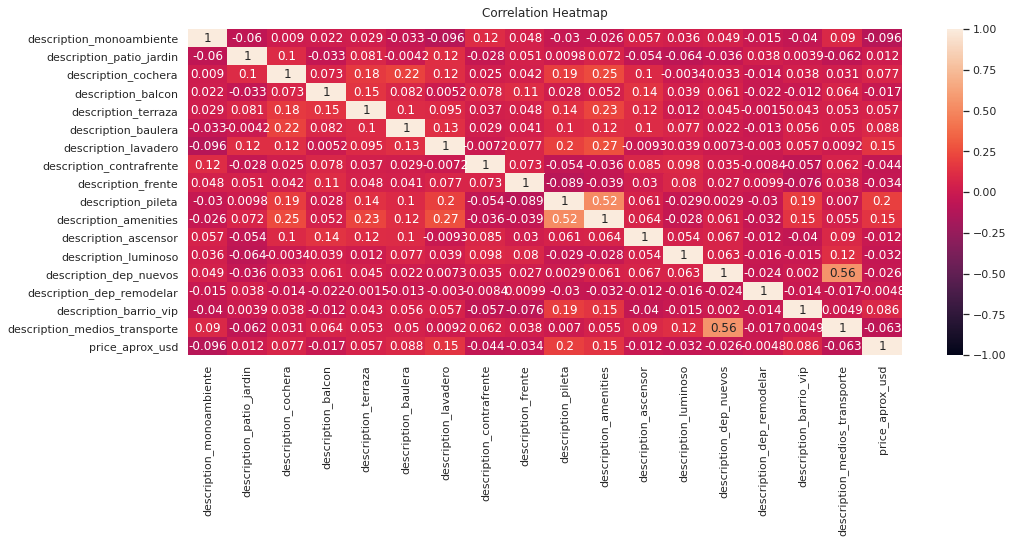

In [63]:
salida_15 = Corr_grafico1(salida_13) # salida print del gráfico en caso de que se quiera verlo

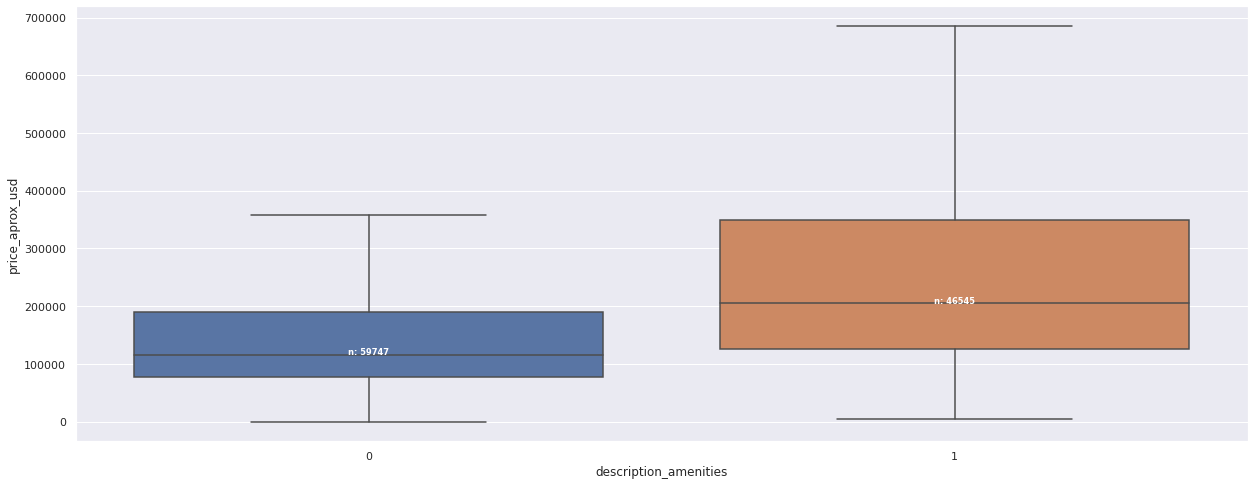

In [64]:
salida_16 = boxplot_dummies(salida_13) # salida print del gráfico en caso de que se quiera verlo

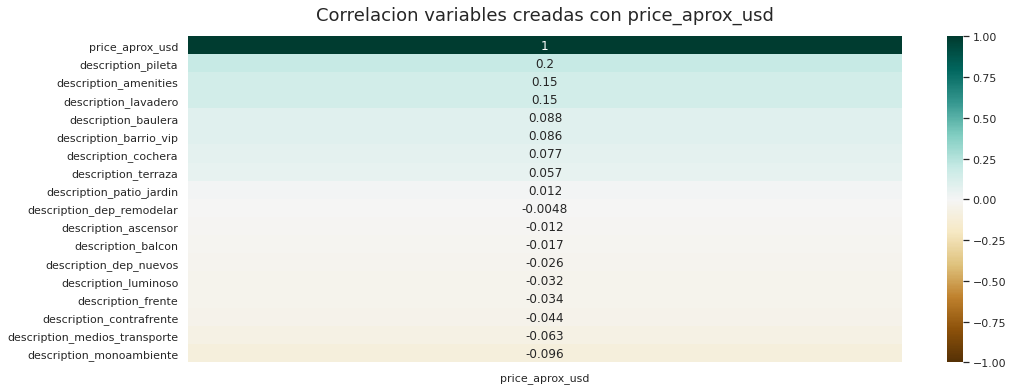

In [65]:
salida_17 = Corr_grafico2(salida_13)  # salida print del gráfico en caso de que se quiera verlo

In [66]:
dataframe_final


,property_type,state_name,rooms,cantidad_ambientes,registros_public_falsas_flag,description_monoambiente,description_patio_jardin,description_cochera,description_balcon,description_terraza,description_baulera,description_lavadero,description_contrafrente,description_frente,description_pileta,description_amenities,description_ascensor,description_luminoso,description_dep_nuevos,description_dep_remodelar,description_barrio_vip,description_medios_transporte,ciudad_separada,precio_unificado,superficie_unificada
1,apartment,Bs.As. G.B.A. Zona Sur,nan,nan,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,La Plata,"1,711.22",nan
2,apartment,Capital Federal,nan,2.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Mataderos,"1,309.09",55.00
4,apartment,Buenos Aires Costa Atlántica,1.00,nan,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Mar del Plata,"1,828.57",35.00
7,apartment,Capital Federal,nan,nan,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,Belgrano,"3,066.67",45.00
8,apartment,Capital Federal,nan,2.00,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,Belgrano,"3,000.00",65.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,apartment,Capital Federal,2.00,nan,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,Belgrano,"7,699.12",113.00
121216,house,Bs.As. G.B.A. Zona Norte,3.00,nan,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,San Isidro,"1,383.33",360.00
121217,apartment,Capital Federal,nan,nan,0,1,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,Villa Urquiza,"2,858.70",46.00
121218,apartment,Buenos Aires Costa Atlántica,nan,2.00,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,Mar del Plata,"1,997.92",48.00


# 7 - Indicadores de limpieza

Cantidad de filas iniciales del dataframe

In [67]:
filas_inicial = raw_data.shape[0]##

Cantidad de filas finales del dataframe

In [68]:
filas_final = dataframe_final.shape[0]##

Datos no nulos en precio por metro cuadrado en dólares iniciales

In [69]:
no_nulo_precio_inicial = raw_data.price_usd_per_m2.notnull().sum()##

Datos no nulos en precio por metro cuadrado en dólares finales

In [70]:
no_nulo_precio_final = dataframe_final.precio_unificado.notnull().sum()##

Datos no nulos en superficie inicial

In [71]:
no_nulo_superficie_inicial = raw_data.surface_total_in_m2.notnull().sum()##

Datos no nulos en superficie final

In [72]:
no_nulo_superficie_final = dataframe_final.superficie_unificada.notnull().sum()##

Cantidad de datos en habitaciones iniciales

In [73]:
cantidad_habitaciones_inicial = raw_data.rooms.notnull().sum()##

Cantidad de datos en habitaciones finales

In [74]:
cantidad_habitaciones_final = dataframe_final.rooms.notnull().sum()##

Cantidad de ambientes final (Dato creado a partir de descripcion)

In [75]:
cantidad_ambientes_final = dataframe_final.cantidad_ambientes.notnull().sum()##

Cantidad de cochera final (dato creado, es dummy)

In [76]:
cantidad_cochera_final = (dataframe_final.description_cochera == 1).sum()

In [77]:
dataframe_desempeño = pd.DataFrame({
    '': ['Cantidad de filas', 'Filas con precio no nulo', 'No nulos superficie', 'Cant. datos en habitación', 'Cant. datos con ambientes','Cant. datos con cochera'],
    'Dataset Original': [filas_inicial, no_nulo_precio_inicial, no_nulo_superficie_inicial, cantidad_habitaciones_inicial, 0,0],
    'Dataset Final': [filas_final, no_nulo_precio_final, no_nulo_superficie_final, cantidad_habitaciones_final, cantidad_ambientes_final,cantidad_cochera_final],
    'dif %': [(filas_final-filas_inicial)/filas_inicial*100, (no_nulo_precio_final-no_nulo_precio_inicial)/no_nulo_precio_inicial*100, (no_nulo_superficie_final-no_nulo_superficie_inicial)/no_nulo_superficie_inicial*100, (cantidad_habitaciones_final-cantidad_habitaciones_inicial)/cantidad_habitaciones_inicial*100, '-','-']})

In [78]:
dataframe_desempeño

,,Dataset Original,Dataset Final,dif %
0,Cantidad de filas,121220,86079,-28.99
1,Filas con precio no nulo,68617,86079,25.45
2,No nulos superficie,81892,80328,-1.91
3,Cant. datos en habitación,47390,60210,27.05
4,Cant. datos con ambientes,0,31391,-
5,Cant. datos con cochera,0,37886,-


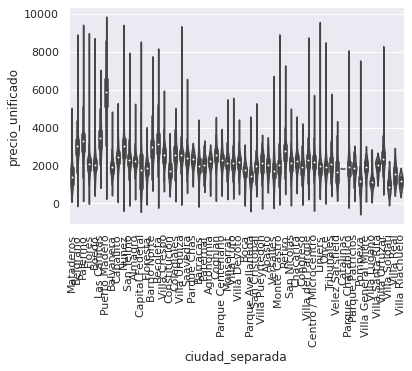

In [79]:
mask_barrios_capital = dataframe_final.state_name=="Capital Federal"
barrios_capital = dataframe_final[mask_barrios_capital][["ciudad_separada","precio_unificado"]].round(2)
#barrios_capital

barrios = dataframe_final[mask_barrios_capital]["ciudad_separada"]
precio_y= dataframe_final[mask_barrios_capital]["precio_unificado"].round(2)
import seaborn as sns
import matplotlib as plt
grafico_outliers =sns.violinplot(x=barrios, y=precio_y)
sns.set(rc={'figure.figsize':(25,10)})
grafico_outliers.set_xticklabels(grafico_outliers.get_xticklabels(), rotation=90);

In [80]:
def grafico_barrios_no_capital(dataframe):
    mask_barrios_no_capital = dataframe.state_name !="Capital Federal"
    barrios_no_capital = dataframe[mask_barrios_no_capital][["state_name","precio_unificado"]].round(2)

    barrios_fuera_capital = dataframe[mask_barrios_no_capital]["state_name"]
    precio_no_capital_y= dataframe[mask_barrios_no_capital]["precio_unificado"].round(2)
    grafico_outliers_no_capital =sns.violinplot(x=barrios_fuera_capital, y=precio_no_capital_y)
    sns.set(rc={'figure.figsize':(200,12)})
    grafico_outliers_no_capital.set_xticklabels(grafico_outliers_no_capital.get_xticklabels(), rotation=90);

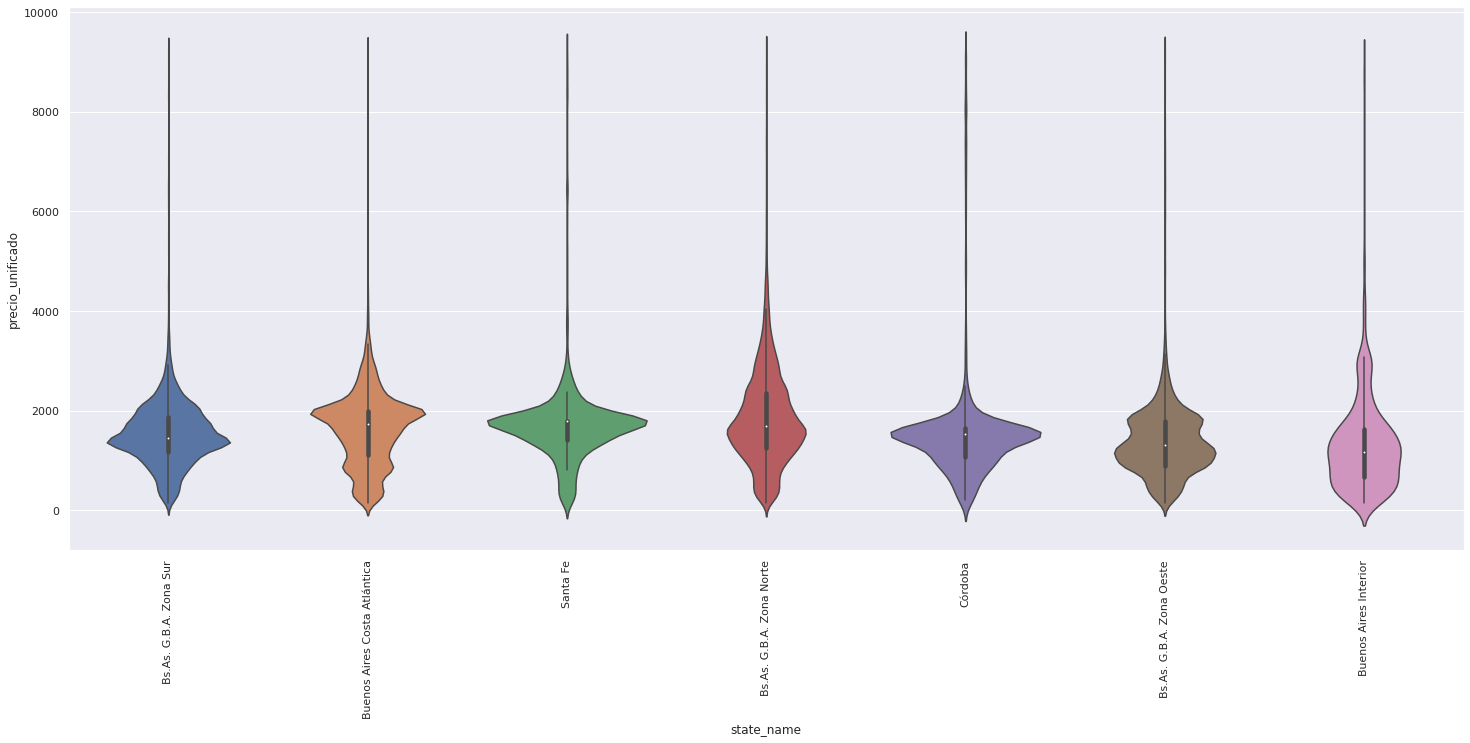

In [81]:
grafico_barrios_no_capital(dataframe_final)

# TRABAJO PRACTICO NUMERO 2

##### Objetivo: a construir un modelo de regresión lineal que estime el precio por m2 de las propiedades.
    ● Seleccionar los datos a modelar. Justificar esa selección
    ● Entrenar al menos tres modelos de regresión lineal distintos sobre estos datos.
    ● Evaluar la performance de los modelos y comparar ventajas y desventajas de cada uno.
    ● Determinar la importancia de las features incluidas en la predicción. Interpretar
    
    

### 1) Selección de los datos para construir el modelo predictivo.

 En el dataset final, que construimos a partir de la limpieza y análsis exploratorio que realizamos en el Trabajo Práctico N°1, nos habíamos quedado con los tipos de propiedad "apartment" y "house", por lo que ahora también nos quedaremos solamente con los barrios de Capital Federal, ya que estos conforman la mayor parte del dataset.
Como primer paso consideramos importante eliminar outliers por barrio. Para esto usaremos un violinplot para visualizar como estan distribuidos los outliers.

In [82]:
#Primero vamos a eliminar las localidades que no sean capital.

df_mask = dataframe_final.loc[:,"state_name"] == "Capital Federal"
df_solo_capital = dataframe_final.loc[df_mask]
print(df_solo_capital.shape)
df_solo_capital.head(5)



(23500, 25)


,property_type,state_name,rooms,cantidad_ambientes,registros_public_falsas_flag,description_monoambiente,description_patio_jardin,description_cochera,description_balcon,description_terraza,description_baulera,description_lavadero,description_contrafrente,description_frente,description_pileta,description_amenities,description_ascensor,description_luminoso,description_dep_nuevos,description_dep_remodelar,description_barrio_vip,description_medios_transporte,ciudad_separada,precio_unificado,superficie_unificada
2,apartment,Capital Federal,nan,2.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Mataderos,"1,309.09",55.00
7,apartment,Capital Federal,nan,nan,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,Belgrano,"3,066.67",45.00
8,apartment,Capital Federal,nan,2.00,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,Belgrano,"3,000.00",65.00
13,apartment,Capital Federal,1.00,3.00,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,Palermo,"2,234.00",50.00
14,apartment,Capital Federal,1.00,nan,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,Palermo,"3,521.43",42.00


Ya tenemos nuestro dataset considerando solamente los barrios de capital. Para eliminar outliers visualizamos mediante un violinplot el precio por metro cuadrado por barrio tal como mostramos en el trabajo anterior.

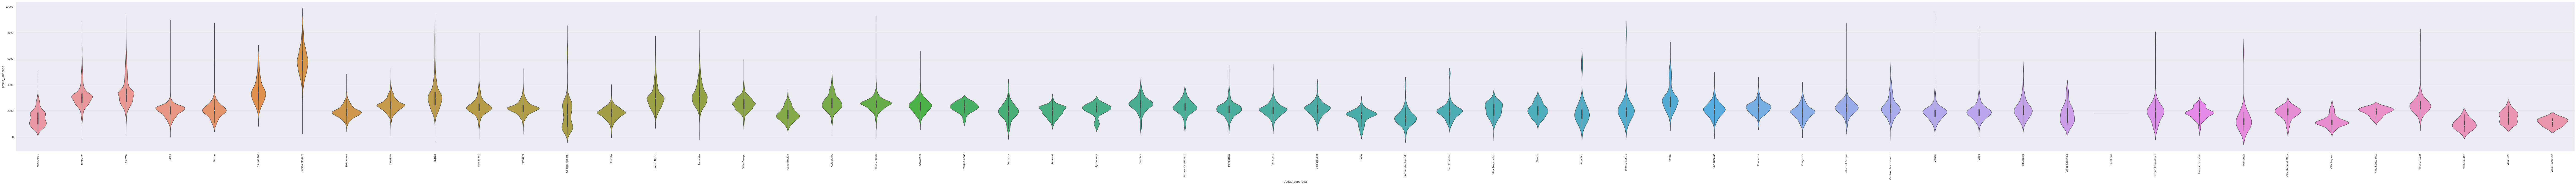

In [83]:
grafico_outliers_capital =sns.violinplot(x=df_solo_capital.ciudad_separada, y=df_solo_capital.precio_unificado)
sns.set(rc={'figure.figsize':(25,10)})
grafico_outliers_capital.set_xticklabels(grafico_outliers_capital.get_xticklabels(), rotation=90);

En este gráfico notamos que hay mas dispersión hacia arriba de cada violin que hacia abajo. Para suavizar esto eliminaremos outliers con el criterio de cuartiles. Tomamos como criterio que se eliminen los datos que acumulen menos del 2% de los datos y aquellos que acumulen mas del 90%.

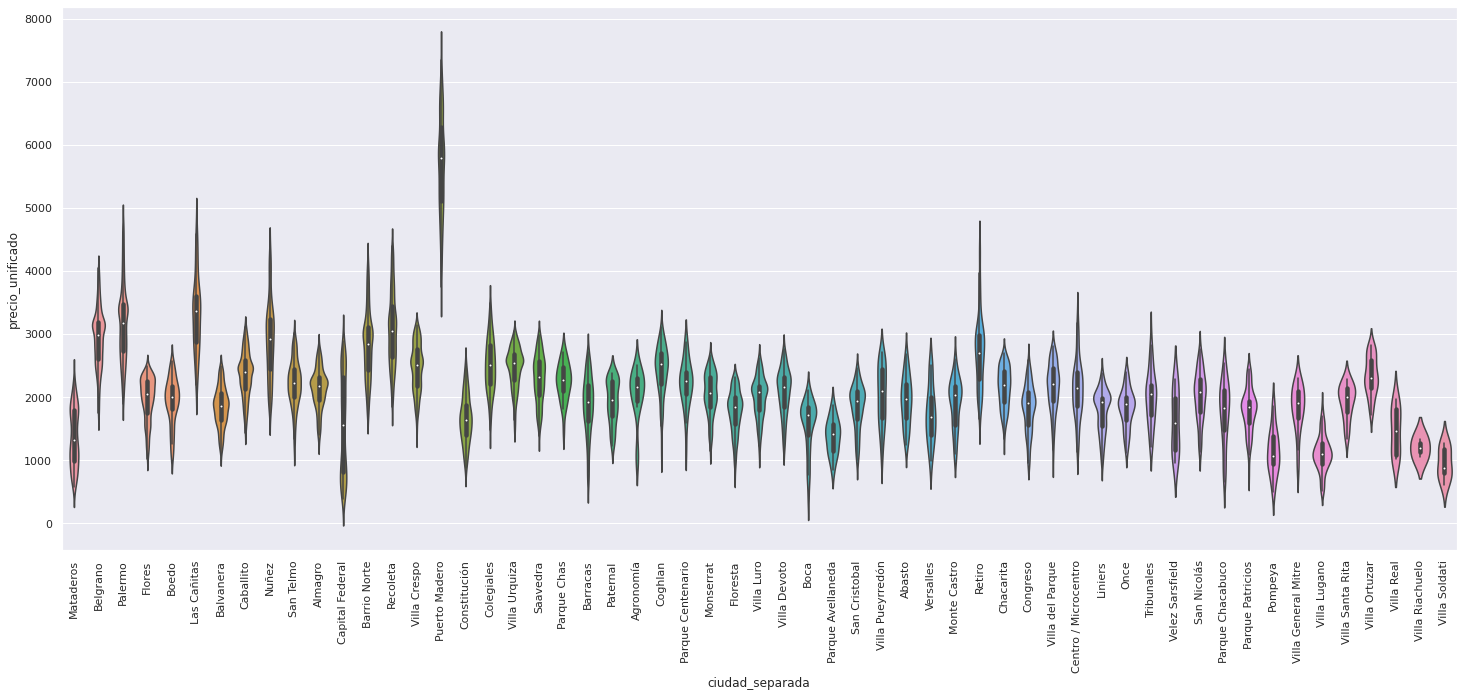

In [84]:
#seleccionamos como umbral minimo 0.02 y como umbral máximo 0.9
qmin = 0.02
qmax = 0.9

#agrupamos por barrio y calculamos los cuartiles.

barrios_agrupados = df_solo_capital.groupby("ciudad_separada")["precio_unificado"].quantile([qmin, qmax]).unstack(level=1)

#filtramos los outliers según los umbrales definidos

mask_barrios_agrupados = (barrios_agrupados.loc[df_solo_capital.ciudad_separada, qmin] < df_solo_capital.precio_unificado.values)\
                          & (df_solo_capital.precio_unificado.values < barrios_agrupados.loc[df_solo_capital.ciudad_separada, qmax])

sin_outliers = df_solo_capital[mask_barrios_agrupados.values]

#Graficamos
grafico_sin_outliers_caba =sns.violinplot(x=sin_outliers.ciudad_separada, y=sin_outliers.precio_unificado)
grafico_sin_outliers_caba.set_xticklabels(grafico_sin_outliers_caba.get_xticklabels(), rotation=90);

Analizando el gráfico de arriba vemos como se redujeron las colas del violin por barrio. Notamos que Puerto Madero es el barrio con una mediana mas alta (USD 6.000) respecto al resto de los barrios. 

### 2) Transformación de variables categóricas en dummies

En este paso vamos a transformar la variable categórica "ciudad_separada" y "propery_type" que representan los barrios de Capital Federal y el tipo de propiedad respectivamente en variables dummies

In [85]:
sin_outliers.shape

(20610, 25)

In [86]:
#Usamos el método get dummies para convertir las variables "ciudad_separada" en variables dummies.
#Tomamos k-1 categorías para evitar multicolinealidad para eso usamos drop_first = True

sin_outliers_dummies = pd.get_dummies(sin_outliers, drop_first=True)
print(sin_outliers_dummies.shape)
sin_outliers_dummies.head()

(20610, 79)


,rooms,cantidad_ambientes,registros_public_falsas_flag,description_monoambiente,description_patio_jardin,description_cochera,description_balcon,description_terraza,description_baulera,description_lavadero,description_contrafrente,description_frente,description_pileta,description_amenities,description_ascensor,description_luminoso,description_dep_nuevos,description_dep_remodelar,description_barrio_vip,description_medios_transporte,precio_unificado,superficie_unificada,property_type_house,ciudad_separada_Agronomía,ciudad_separada_Almagro,ciudad_separada_Balvanera,ciudad_separada_Barracas,ciudad_separada_Barrio Norte,ciudad_separada_Belgrano,ciudad_separada_Boca,ciudad_separada_Boedo,ciudad_separada_Caballito,ciudad_separada_Capital Federal,ciudad_separada_Centro / Microcentro,ciudad_separada_Chacarita,ciudad_separada_Coghlan,ciudad_separada_Colegiales,ciudad_separada_Congreso,ciudad_separada_Constitución,ciudad_separada_Flores,ciudad_separada_Floresta,ciudad_separada_Las Cañitas,ciudad_separada_Liniers,ciudad_separada_Mataderos,ciudad_separada_Monserrat,ciudad_separada_Monte Castro,ciudad_separada_Nuñez,ciudad_separada_Once,ciudad_separada_Palermo,ciudad_separada_Parque Avellaneda,ciudad_separada_Parque Centenario,ciudad_separada_Parque Chacabuco,ciudad_separada_Parque Chas,ciudad_separada_Parque Patricios,ciudad_separada_Paternal,ciudad_separada_Pompeya,ciudad_separada_Puerto Madero,ciudad_separada_Recoleta,ciudad_separada_Retiro,ciudad_separada_Saavedra,ciudad_separada_San Cristobal,ciudad_separada_San Nicolás,ciudad_separada_San Telmo,ciudad_separada_Tribunales,ciudad_separada_Velez Sarsfield,ciudad_separada_Versalles,ciudad_separada_Villa Crespo,ciudad_separada_Villa Devoto,ciudad_separada_Villa General Mitre,ciudad_separada_Villa Lugano,ciudad_separada_Villa Luro,ciudad_separada_Villa Ortuzar,ciudad_separada_Villa Pueyrredón,ciudad_separada_Villa Real,ciudad_separada_Villa Riachuelo,ciudad_separada_Villa Santa Rita,ciudad_separada_Villa Soldati,ciudad_separada_Villa Urquiza,ciudad_separada_Villa del Parque
2,nan,2.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"1,309.09",55.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,nan,nan,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,"3,066.67",45.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,nan,2.00,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,"3,000.00",65.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1.00,3.00,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,"2,234.00",50.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,1.00,nan,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,"3,521.43",42.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Las variables dummies de barrios se armaron en función al barrio de Abasto.
Las variables dummies en cuanto a propiedad se armó en función a Apartment.

### 3) Armamos el primer modelo usando Regresión Lineal

Como primer modelo vamos a probar usando todas las variables del dataset. La variables predictoras serán todas menos "precio_unificado" y "registros_public_falsas_flag". Nuestra variables a predecir será el precio por metro cuadrado.

Además, se elimina "superficie_unificada" debido a que según el criterio nuestro, si calculamos la superficie por metro cuadrado, es una variable redundante. Aunque haciendo las pruebas la diferencia es muy mínima con betas muy muy pequeños.

Como hay filas con valores NaN es necesario transformarlas a 0 para poder aplicar el modelo.

In [87]:
sin_outliers_dummies.isnull().sum()[sin_outliers_dummies.isnull().sum() > 0]

rooms                   7946
cantidad_ambientes      9555
superficie_unificada     348
dtype: int64

In [88]:
#Se eliminan las columnas
sin_outliers_sin_nan_dummies = sin_outliers_dummies.drop(sin_outliers_dummies[["rooms","cantidad_ambientes", "superficie_unificada"]], axis=1)

In [89]:
sin_outliers_sin_nan_dummies.isnull().sum()[sin_outliers_sin_nan_dummies.isnull().sum() > 0]

Series([], dtype: int64)

In [90]:
sin_outliers_sin_nan_dummies.shape

(20610, 76)

In [91]:
#Importamos las librerias que vamos a necesitar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Instancimos el modelo
modelo_uno = LinearRegression(fit_intercept=True)

#Preparamos los datos en una matriz de features y un array target. Del dataset sacamos precio_unificado 
#porque es lo que queremos predecir y "registros_public_falsas_flag".

X = sin_outliers_sin_nan_dummies.drop(sin_outliers_sin_nan_dummies[["precio_unificado","registros_public_falsas_flag"]], axis=1)
y = sin_outliers_sin_nan_dummies.precio_unificado

#Separamos el modelo en train y test

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 100)

#Entrenamos el modelo

modelo_uno.fit(Xtrain, ytrain)

#Imprimimos los coeficientes
print("B0=", modelo_uno.intercept_)
print("Betas j: ", modelo_uno.coef_)
print("----------------------------------")

#Vemos el R2 del modelo de entrenamiento
print("R2 modelo_uno entrenamiento:",modelo_uno.score(Xtrain, ytrain))
print("--------------------------------------------")

#Vamos a hacer la predicción
ypred = modelo_uno.predict(Xtest)

B0_linear = modelo_uno.intercept_
r2_linear = r2_score(ytest, ypred)
MAE_linear = mean_absolute_error(ytest, ypred)
MSE_linear = mean_squared_error(ytest, ypred)
RMSE_linear = np.sqrt(mean_squared_error(ytest, ypred))

print("R2 modelo_uno (linear) test: ", r2_linear)
print("MAE modelo_uno (linear) test:", MAE_linear)
print("MSE modelo_uno (linear) test:", MSE_linear)
print("RMSE modelo_uno (linear) test:", RMSE_linear)

B0= 1992.2380865921532
Betas j:  [ 3.63792109e+01 -1.42093634e+02  1.56048516e+02 -4.01074276e+00
 -5.25485827e+01 -8.59216207e+00 -4.81787813e+01 -1.59154695e+01
 -3.32417966e+01  1.29055859e+02  6.54809604e+01 -7.24655313e+00
 -2.19304469e+01  7.01815595e+01 -1.96898146e+02 -5.03970925e+01
 -3.34892320e+01 -5.74583811e+02  4.14365834e+01  1.75090545e+02
 -9.74565194e+01 -7.64777195e+01  8.39141870e+02  8.93127860e+02
 -3.76836321e+02  6.94881577e+00  3.41858949e+02 -2.17710579e+02
  1.77757887e+02  9.57290234e+01  3.75005095e+02  5.12762574e+02
 -1.38238987e+02 -2.98209014e+02  6.60305310e+00 -9.94231908e+01
  1.29447088e+03 -7.68670492e+01 -3.01164352e+02  9.35367744e+00
  3.30046724e+01  9.14022092e+02 -1.20745777e+02  1.11089208e+03
 -3.83176655e+02  1.18446383e+02 -2.16353764e+01  2.70867100e+02
 -1.31935151e+02  3.28922973e+01 -5.00741141e+02  3.50182345e+03
  1.08087626e+03  7.19589360e+02  2.74333153e+02 -1.32481592e+02
  5.34567067e+01  1.59487535e+02  5.91189014e+01 -1.72095

Tanto el modelo de entrenamiento como el modelo de test da R2 similares por lo que podemos pensar es que no hay un sobreajuste de los datos.

Interpretación de los coeficientes de este primer modelo: B0 = 2031.53 indica que Apartment en el Barrio de Abasto tiene ese valor esperado suponiendo que los demas coeficientes son 0.

### 4) Usando la libreria Statsmodels vamos a ver la significancia de los coeficientes.
Usando esta libreria podemos ver el resumen de los datos del modelo.

In [92]:
#importamos la libreria statsmodels
import statsmodels.api as sm

X=sin_outliers_sin_nan_dummies.drop(sin_outliers_sin_nan_dummies[["precio_unificado","registros_public_falsas_flag"]], axis=1)
y = sin_outliers_sin_nan_dummies.precio_unificado

#agragamos explicitamente una constante
X=sm.add_constant(X)

#Seleccionamos el modelo de minimos cuadrados y lo ajustamos.
model_dos = sm.OLS(y,X).fit()

#Imprimimos el resumen.
print(model_dos.summary())

                            OLS Regression Results                            
Dep. Variable:       precio_unificado   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     791.6
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:42:18   Log-Likelihood:            -1.5462e+05
No. Observations:               20610   AIC:                         3.094e+05
Df Residuals:                   20535   BIC:                         3.100e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


En la salida de Statsmodels podemos ver que hay varias variables con P value elevado (>0.05), esos casos habria que eliminarlos ya que podemos pensar que existe evidencia para aceptar la hipótesis nula de que esos coeficientes son iguales a cero.
Sin embargo, se intentará que se reduzcan lo menos posibles a través de la regularización.

## Lasso

In [93]:
from sklearn import linear_model
lista=np.linspace(-1,5,1000)

model_lasso = linear_model.LassoCV(alphas=lista, cv=10,normalize=True)
model_lasso.fit(Xtrain, ytrain)

ypred = model_lasso.predict(Xtest)

B0_lasso = model_lasso.intercept_
alpha_lasso = model_lasso.alpha_
r2_lasso = r2_score(ytest, ypred)
MAE_lasso = mean_absolute_error(ytest, ypred)
MSE_lasso = mean_squared_error(ytest, ypred)
RMSE_lasso = np.sqrt(mean_squared_error(ytest, ypred))
coef_cero = (model_lasso.coef_ == 0).sum()

print("Beta 0 (lasso)", B0_lasso)
print("alpha óptimo (lasso)", alpha_lasso)
print("R2 (lasso)", r2_lasso)
print("MAE (lasso):", MAE_lasso)
print("MSE (lasso):", MSE_lasso)
print("RMSE (lasso):", RMSE_lasso)
print("Cantidad de coeficientes anulados:", coef_cero)

Beta 0 (lasso) 2117.9226686541324
alpha óptimo (lasso) 0.0030030030030030463
R2 (lasso) 0.7388462329611607
MAE (lasso): 341.3581095786776
MSE (lasso): 197766.5466748832
RMSE (lasso): 444.70950819032777
Cantidad de coeficientes anulados: 3


## Ridge

In [94]:
from sklearn import linear_model
lista=np.linspace(-1,1,50)

model_ridge = linear_model.RidgeCV(alphas=lista, cv=10,normalize=True)
model_ridge.fit(Xtrain, ytrain)

ypred = model_ridge.predict(Xtest)

B0_ridge = model_ridge.intercept_
alpha_ridge = model_ridge.alpha_
r2_ridge = r2_score(ytest, ypred)
MAE_ridge = mean_absolute_error(ytest, ypred)
MSE_ridge = mean_squared_error(ytest, ypred)
RMSE_ridge = np.sqrt(mean_squared_error(ytest, ypred))

print("Beta 0 (ridge)", B0_ridge)
print("alpha óptimo (ridge)", alpha_ridge)
print("R2 (ridge)", r2_ridge)
print("MAE (ridge):", MAE_ridge)
print("MSE (ridge):", MSE_ridge)
print("RMSE (ridge):", RMSE_ridge)

Beta 0 (ridge) 2446.3485084491813
alpha óptimo (ridge) 0.020408163265306145
R2 (ridge) 0.7377586393086415
MAE (ridge): 341.9766570416171
MSE (ridge): 198590.1596875658
RMSE (ridge): 445.63455845296136


## Cuadro de comparación entre modelos

In [95]:
dataframe_desempeño = pd.DataFrame({
    'Método': ['Linear_regression', 'Lasso', 'Ridge'],
    'Beta 0': [B0_linear, B0_lasso, B0_ridge],
    'alpha óptimo': ["N/A", alpha_lasso, alpha_ridge],
    'R2': [r2_linear, r2_lasso, r2_ridge],
    'MAE': [MAE_linear, MAE_lasso, MAE_ridge],
    'MSE': [MSE_linear, MSE_lasso, MSE_ridge],
    'RMSE': [RMSE_linear, RMSE_lasso, RMSE_ridge],
    'coeficientes anulados': ["N/A", coef_cero,"N/A"]})
dataframe_desempeño

,Método,Beta 0,alpha óptimo,R2,MAE,MSE,RMSE,coeficientes anulados
0,Linear_regression,"1,992.24",N/A,0.74,341.36,"197,799.65",444.75,N/A
1,Lasso,"2,117.92",0.00,0.74,341.36,"197,766.55",444.71,3
2,Ridge,"2,446.35",0.02,0.74,341.98,"198,590.16",445.63,N/A


## Estimaciones de comprobación

Considerando que en el beta0 están las dummies de Departamento y Agronomía, a partir de ahí se "encienden" o "apagan" los demás betas. Por eso mismo, por ejemplo, para calcular departamento, no se tiene que incluir ningún beta adicional.

Para esta predicción, utilizamos los resultados del modelo de regresión lineal para estimar los siguientes ejemplos.

Ejemplo de predicción de Departamento Monoambiente en Agronomía

In [96]:
#         beta 0      beta monoambiente         beta agronomía
prueba1 = B0_linear + 36.379210936398714 * 1 + 41.4365834333544 * 1
print("El precio del metro cuadrado estimado es: USD", prueba1.round(2))

El precio del metro cuadrado estimado es: USD 2070.05


Ejemplo de predicción de Departamento Monoambiente en Barrio Norte con balcón

In [97]:
#         beta 0      beta monoambiente        beta barrio norte       beta balcón
prueba2 = B0_linear + 36.379210936398714 * 1 + 839.1418701736798 *1 + -4.010742761183394 * 1
print("El precio del metro cuadrado estimado es: USD", prueba2.round(2))

El precio del metro cuadrado estimado es: USD 2863.75


In [98]:
list(zip(Xtrain.columns, modelo_uno.coef_))

[('description_monoambiente', 36.379210936398714),
 ('description_patio_jardin', -142.09363438173125),
 ('description_cochera', 156.0485160477908),
 ('description_balcon', -4.010742761183394),
 ('description_terraza', -52.54858272175488),
 ('description_baulera', -8.59216206517658),
 ('description_lavadero', -48.178781340855835),
 ('description_contrafrente', -15.91546945899779),
 ('description_frente', -33.24179658355638),
 ('description_pileta', 129.05585872481475),
 ('description_amenities', 65.48096039217603),
 ('description_ascensor', -7.246553134031899),
 ('description_luminoso', -21.930446861755286),
 ('description_dep_nuevos', 70.1815594546344),
 ('description_dep_remodelar', -196.89814588542464),
 ('description_barrio_vip', -50.39709249225473),
 ('description_medios_transporte', -33.489232038359035),
 ('property_type_house', -574.5838110172454),
 ('ciudad_separada_Agronomía', 41.4365834333544),
 ('ciudad_separada_Almagro', 175.09054485914658),
 ('ciudad_separada_Balvanera', -9